In [1]:
import fastai
from fastai.vision import *
from fastai.widgets import *
import shutil
from fastai.callbacks import *
from tqdm import tqdm
print(f'fastai: {fastai.__version__}')
print(f'cuda: {torch.cuda.is_available()}')

import gc
import torch


from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

path = '/datadrive/shreyas/ML_PIPELINE/automl/'


tfms = get_transforms(flip_vert=False, max_lighting=0.1, max_zoom=1.05, max_warp=0.)
np.random.seed(42)
src = (ImageList.from_csv(path, 'ml_trainset_1k.csv', folder='images')
       .split_by_rand_pct(0.2)
       .label_from_df(label_delim=','))

size = 112
bs = 256
data = (src.transform(tfms, size=size)
        .databunch(bs = bs).normalize(imagenet_stats))

arch = models.resnet50
acc_02 = partial(accuracy_thresh, thresh=0.2)
f_score = partial(fbeta, thresh=0.4)



fastai: 1.0.54
cuda: True


In [55]:
os.listdir(path)

['images', 'models', 'ml_trainset_1k.csv', 'val_images', 'ml_testset_1k.csv']

In [8]:
data.classes.index('0.0')

0

In [63]:
lr = 0.01
epoch = 15
model_name = ''
learn = cnn_learner(data, arch, metrics=[acc_02, f_score], pretrained = True)
learn.fit_one_cycle(epoch,slice(lr),callbacks=[ShowGraph(learn),SaveModelCallback(learn)])

learn.save(model_name)

learn.load(model_name);




epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time


RuntimeError: Error(s) in loading state_dict for Sequential:
	Missing key(s) in state_dict: "0.0.weight", "0.1.weight", "0.1.bias", "0.1.running_mean", "0.1.running_var", "0.4.0.conv1.weight", "0.4.0.bn1.weight", "0.4.0.bn1.bias", "0.4.0.bn1.running_mean", "0.4.0.bn1.running_var", "0.4.0.conv2.weight", "0.4.0.bn2.weight", "0.4.0.bn2.bias", "0.4.0.bn2.running_mean", "0.4.0.bn2.running_var", "0.4.0.conv3.weight", "0.4.0.bn3.weight", "0.4.0.bn3.bias", "0.4.0.bn3.running_mean", "0.4.0.bn3.running_var", "0.4.0.downsample.0.weight", "0.4.0.downsample.1.weight", "0.4.0.downsample.1.bias", "0.4.0.downsample.1.running_mean", "0.4.0.downsample.1.running_var", "0.4.1.conv1.weight", "0.4.1.bn1.weight", "0.4.1.bn1.bias", "0.4.1.bn1.running_mean", "0.4.1.bn1.running_var", "0.4.1.conv2.weight", "0.4.1.bn2.weight", "0.4.1.bn2.bias", "0.4.1.bn2.running_mean", "0.4.1.bn2.running_var", "0.4.1.conv3.weight", "0.4.1.bn3.weight", "0.4.1.bn3.bias", "0.4.1.bn3.running_mean", "0.4.1.bn3.running_var", "0.4.2.conv1.weight", "0.4.2.bn1.weight", "0.4.2.bn1.bias", "0.4.2.bn1.running_mean", "0.4.2.bn1.running_var", "0.4.2.conv2.weight", "0.4.2.bn2.weight", "0.4.2.bn2.bias", "0.4.2.bn2.running_mean", "0.4.2.bn2.running_var", "0.4.2.conv3.weight", "0.4.2.bn3.weight", "0.4.2.bn3.bias", "0.4.2.bn3.running_mean", "0.4.2.bn3.running_var", "0.5.0.conv1.weight", "0.5.0.bn1.weight", "0.5.0.bn1.bias", "0.5.0.bn1.running_mean", "0.5.0.bn1.running_var", "0.5.0.conv2.weight", "0.5.0.bn2.weight", "0.5.0.bn2.bias", "0.5.0.bn2.running_mean", "0.5.0.bn2.running_var", "0.5.0.conv3.weight", "0.5.0.bn3.weight", "0.5.0.bn3.bias", "0.5.0.bn3.running_mean", "0.5.0.bn3.running_var", "0.5.0.downsample.0.weight", "0.5.0.downsample.1.weight", "0.5.0.downsample.1.bias", "0.5.0.downsample.1.running_mean", "0.5.0.downsample.1.running_var", "0.5.1.conv1.weight", "0.5.1.bn1.weight", "0.5.1.bn1.bias", "0.5.1.bn1.running_mean", "0.5.1.bn1.running_var", "0.5.1.conv2.weight", "0.5.1.bn2.weight", "0.5.1.bn2.bias", "0.5.1.bn2.running_mean", "0.5.1.bn2.running_var", "0.5.1.conv3.weight", "0.5.1.bn3.weight", "0.5.1.bn3.bias", "0.5.1.bn3.running_mean", "0.5.1.bn3.running_var", "0.5.2.conv1.weight", "0.5.2.bn1.weight", "0.5.2.bn1.bias", "0.5.2.bn1.running_mean", "0.5.2.bn1.running_var", "0.5.2.conv2.weight", "0.5.2.bn2.weight", "0.5.2.bn2.bias", "0.5.2.bn2.running_mean", "0.5.2.bn2.running_var", "0.5.2.conv3.weight", "0.5.2.bn3.weight", "0.5.2.bn3.bias", "0.5.2.bn3.running_mean", "0.5.2.bn3.running_var", "0.5.3.conv1.weight", "0.5.3.bn1.weight", "0.5.3.bn1.bias", "0.5.3.bn1.running_mean", "0.5.3.bn1.running_var", "0.5.3.conv2.weight", "0.5.3.bn2.weight", "0.5.3.bn2.bias", "0.5.3.bn2.running_mean", "0.5.3.bn2.running_var", "0.5.3.conv3.weight", "0.5.3.bn3.weight", "0.5.3.bn3.bias", "0.5.3.bn3.running_mean", "0.5.3.bn3.running_var", "0.6.0.conv1.weight", "0.6.0.bn1.weight", "0.6.0.bn1.bias", "0.6.0.bn1.running_mean", "0.6.0.bn1.running_var", "0.6.0.conv2.weight", "0.6.0.bn2.weight", "0.6.0.bn2.bias", "0.6.0.bn2.running_mean", "0.6.0.bn2.running_var", "0.6.0.conv3.weight", "0.6.0.bn3.weight", "0.6.0.bn3.bias", "0.6.0.bn3.running_mean", "0.6.0.bn3.running_var", "0.6.0.downsample.0.weight", "0.6.0.downsample.1.weight", "0.6.0.downsample.1.bias", "0.6.0.downsample.1.running_mean", "0.6.0.downsample.1.running_var", "0.6.1.conv1.weight", "0.6.1.bn1.weight", "0.6.1.bn1.bias", "0.6.1.bn1.running_mean", "0.6.1.bn1.running_var", "0.6.1.conv2.weight", "0.6.1.bn2.weight", "0.6.1.bn2.bias", "0.6.1.bn2.running_mean", "0.6.1.bn2.running_var", "0.6.1.conv3.weight", "0.6.1.bn3.weight", "0.6.1.bn3.bias", "0.6.1.bn3.running_mean", "0.6.1.bn3.running_var", "0.6.2.conv1.weight", "0.6.2.bn1.weight", "0.6.2.bn1.bias", "0.6.2.bn1.running_mean", "0.6.2.bn1.running_var", "0.6.2.conv2.weight", "0.6.2.bn2.weight", "0.6.2.bn2.bias", "0.6.2.bn2.running_mean", "0.6.2.bn2.running_var", "0.6.2.conv3.weight", "0.6.2.bn3.weight", "0.6.2.bn3.bias", "0.6.2.bn3.running_mean", "0.6.2.bn3.running_var", "0.6.3.conv1.weight", "0.6.3.bn1.weight", "0.6.3.bn1.bias", "0.6.3.bn1.running_mean", "0.6.3.bn1.running_var", "0.6.3.conv2.weight", "0.6.3.bn2.weight", "0.6.3.bn2.bias", "0.6.3.bn2.running_mean", "0.6.3.bn2.running_var", "0.6.3.conv3.weight", "0.6.3.bn3.weight", "0.6.3.bn3.bias", "0.6.3.bn3.running_mean", "0.6.3.bn3.running_var", "0.6.4.conv1.weight", "0.6.4.bn1.weight", "0.6.4.bn1.bias", "0.6.4.bn1.running_mean", "0.6.4.bn1.running_var", "0.6.4.conv2.weight", "0.6.4.bn2.weight", "0.6.4.bn2.bias", "0.6.4.bn2.running_mean", "0.6.4.bn2.running_var", "0.6.4.conv3.weight", "0.6.4.bn3.weight", "0.6.4.bn3.bias", "0.6.4.bn3.running_mean", "0.6.4.bn3.running_var", "0.6.5.conv1.weight", "0.6.5.bn1.weight", "0.6.5.bn1.bias", "0.6.5.bn1.running_mean", "0.6.5.bn1.running_var", "0.6.5.conv2.weight", "0.6.5.bn2.weight", "0.6.5.bn2.bias", "0.6.5.bn2.running_mean", "0.6.5.bn2.running_var", "0.6.5.conv3.weight", "0.6.5.bn3.weight", "0.6.5.bn3.bias", "0.6.5.bn3.running_mean", "0.6.5.bn3.running_var", "0.7.0.conv1.weight", "0.7.0.bn1.weight", "0.7.0.bn1.bias", "0.7.0.bn1.running_mean", "0.7.0.bn1.running_var", "0.7.0.conv2.weight", "0.7.0.bn2.weight", "0.7.0.bn2.bias", "0.7.0.bn2.running_mean", "0.7.0.bn2.running_var", "0.7.0.conv3.weight", "0.7.0.bn3.weight", "0.7.0.bn3.bias", "0.7.0.bn3.running_mean", "0.7.0.bn3.running_var", "0.7.0.downsample.0.weight", "0.7.0.downsample.1.weight", "0.7.0.downsample.1.bias", "0.7.0.downsample.1.running_mean", "0.7.0.downsample.1.running_var", "0.7.1.conv1.weight", "0.7.1.bn1.weight", "0.7.1.bn1.bias", "0.7.1.bn1.running_mean", "0.7.1.bn1.running_var", "0.7.1.conv2.weight", "0.7.1.bn2.weight", "0.7.1.bn2.bias", "0.7.1.bn2.running_mean", "0.7.1.bn2.running_var", "0.7.1.conv3.weight", "0.7.1.bn3.weight", "0.7.1.bn3.bias", "0.7.1.bn3.running_mean", "0.7.1.bn3.running_var", "0.7.2.conv1.weight", "0.7.2.bn1.weight", "0.7.2.bn1.bias", "0.7.2.bn1.running_mean", "0.7.2.bn1.running_var", "0.7.2.conv2.weight", "0.7.2.bn2.weight", "0.7.2.bn2.bias", "0.7.2.bn2.running_mean", "0.7.2.bn2.running_var", "0.7.2.conv3.weight", "0.7.2.bn3.weight", "0.7.2.bn3.bias", "0.7.2.bn3.running_mean", "0.7.2.bn3.running_var". 
	Unexpected key(s) in state_dict: "0.0.conv0.weight", "0.0.norm0.weight", "0.0.norm0.bias", "0.0.norm0.running_mean", "0.0.norm0.running_var", "0.0.norm0.num_batches_tracked", "0.0.denseblock1.denselayer1.norm1.weight", "0.0.denseblock1.denselayer1.norm1.bias", "0.0.denseblock1.denselayer1.norm1.running_mean", "0.0.denseblock1.denselayer1.norm1.running_var", "0.0.denseblock1.denselayer1.norm1.num_batches_tracked", "0.0.denseblock1.denselayer1.conv1.weight", "0.0.denseblock1.denselayer1.norm2.weight", "0.0.denseblock1.denselayer1.norm2.bias", "0.0.denseblock1.denselayer1.norm2.running_mean", "0.0.denseblock1.denselayer1.norm2.running_var", "0.0.denseblock1.denselayer1.norm2.num_batches_tracked", "0.0.denseblock1.denselayer1.conv2.weight", "0.0.denseblock1.denselayer2.norm1.weight", "0.0.denseblock1.denselayer2.norm1.bias", "0.0.denseblock1.denselayer2.norm1.running_mean", "0.0.denseblock1.denselayer2.norm1.running_var", "0.0.denseblock1.denselayer2.norm1.num_batches_tracked", "0.0.denseblock1.denselayer2.conv1.weight", "0.0.denseblock1.denselayer2.norm2.weight", "0.0.denseblock1.denselayer2.norm2.bias", "0.0.denseblock1.denselayer2.norm2.running_mean", "0.0.denseblock1.denselayer2.norm2.running_var", "0.0.denseblock1.denselayer2.norm2.num_batches_tracked", "0.0.denseblock1.denselayer2.conv2.weight", "0.0.denseblock1.denselayer3.norm1.weight", "0.0.denseblock1.denselayer3.norm1.bias", "0.0.denseblock1.denselayer3.norm1.running_mean", "0.0.denseblock1.denselayer3.norm1.running_var", "0.0.denseblock1.denselayer3.norm1.num_batches_tracked", "0.0.denseblock1.denselayer3.conv1.weight", "0.0.denseblock1.denselayer3.norm2.weight", "0.0.denseblock1.denselayer3.norm2.bias", "0.0.denseblock1.denselayer3.norm2.running_mean", "0.0.denseblock1.denselayer3.norm2.running_var", "0.0.denseblock1.denselayer3.norm2.num_batches_tracked", "0.0.denseblock1.denselayer3.conv2.weight", "0.0.denseblock1.denselayer4.norm1.weight", "0.0.denseblock1.denselayer4.norm1.bias", "0.0.denseblock1.denselayer4.norm1.running_mean", "0.0.denseblock1.denselayer4.norm1.running_var", "0.0.denseblock1.denselayer4.norm1.num_batches_tracked", "0.0.denseblock1.denselayer4.conv1.weight", "0.0.denseblock1.denselayer4.norm2.weight", "0.0.denseblock1.denselayer4.norm2.bias", "0.0.denseblock1.denselayer4.norm2.running_mean", "0.0.denseblock1.denselayer4.norm2.running_var", "0.0.denseblock1.denselayer4.norm2.num_batches_tracked", "0.0.denseblock1.denselayer4.conv2.weight", "0.0.denseblock1.denselayer5.norm1.weight", "0.0.denseblock1.denselayer5.norm1.bias", "0.0.denseblock1.denselayer5.norm1.running_mean", "0.0.denseblock1.denselayer5.norm1.running_var", "0.0.denseblock1.denselayer5.norm1.num_batches_tracked", "0.0.denseblock1.denselayer5.conv1.weight", "0.0.denseblock1.denselayer5.norm2.weight", "0.0.denseblock1.denselayer5.norm2.bias", "0.0.denseblock1.denselayer5.norm2.running_mean", "0.0.denseblock1.denselayer5.norm2.running_var", "0.0.denseblock1.denselayer5.norm2.num_batches_tracked", "0.0.denseblock1.denselayer5.conv2.weight", "0.0.denseblock1.denselayer6.norm1.weight", "0.0.denseblock1.denselayer6.norm1.bias", "0.0.denseblock1.denselayer6.norm1.running_mean", "0.0.denseblock1.denselayer6.norm1.running_var", "0.0.denseblock1.denselayer6.norm1.num_batches_tracked", "0.0.denseblock1.denselayer6.conv1.weight", "0.0.denseblock1.denselayer6.norm2.weight", "0.0.denseblock1.denselayer6.norm2.bias", "0.0.denseblock1.denselayer6.norm2.running_mean", "0.0.denseblock1.denselayer6.norm2.running_var", "0.0.denseblock1.denselayer6.norm2.num_batches_tracked", "0.0.denseblock1.denselayer6.conv2.weight", "0.0.transition1.norm.weight", "0.0.transition1.norm.bias", "0.0.transition1.norm.running_mean", "0.0.transition1.norm.running_var", "0.0.transition1.norm.num_batches_tracked", "0.0.transition1.conv.weight", "0.0.denseblock2.denselayer1.norm1.weight", "0.0.denseblock2.denselayer1.norm1.bias", "0.0.denseblock2.denselayer1.norm1.running_mean", "0.0.denseblock2.denselayer1.norm1.running_var", "0.0.denseblock2.denselayer1.norm1.num_batches_tracked", "0.0.denseblock2.denselayer1.conv1.weight", "0.0.denseblock2.denselayer1.norm2.weight", "0.0.denseblock2.denselayer1.norm2.bias", "0.0.denseblock2.denselayer1.norm2.running_mean", "0.0.denseblock2.denselayer1.norm2.running_var", "0.0.denseblock2.denselayer1.norm2.num_batches_tracked", "0.0.denseblock2.denselayer1.conv2.weight", "0.0.denseblock2.denselayer2.norm1.weight", "0.0.denseblock2.denselayer2.norm1.bias", "0.0.denseblock2.denselayer2.norm1.running_mean", "0.0.denseblock2.denselayer2.norm1.running_var", "0.0.denseblock2.denselayer2.norm1.num_batches_tracked", "0.0.denseblock2.denselayer2.conv1.weight", "0.0.denseblock2.denselayer2.norm2.weight", "0.0.denseblock2.denselayer2.norm2.bias", "0.0.denseblock2.denselayer2.norm2.running_mean", "0.0.denseblock2.denselayer2.norm2.running_var", "0.0.denseblock2.denselayer2.norm2.num_batches_tracked", "0.0.denseblock2.denselayer2.conv2.weight", "0.0.denseblock2.denselayer3.norm1.weight", "0.0.denseblock2.denselayer3.norm1.bias", "0.0.denseblock2.denselayer3.norm1.running_mean", "0.0.denseblock2.denselayer3.norm1.running_var", "0.0.denseblock2.denselayer3.norm1.num_batches_tracked", "0.0.denseblock2.denselayer3.conv1.weight", "0.0.denseblock2.denselayer3.norm2.weight", "0.0.denseblock2.denselayer3.norm2.bias", "0.0.denseblock2.denselayer3.norm2.running_mean", "0.0.denseblock2.denselayer3.norm2.running_var", "0.0.denseblock2.denselayer3.norm2.num_batches_tracked", "0.0.denseblock2.denselayer3.conv2.weight", "0.0.denseblock2.denselayer4.norm1.weight", "0.0.denseblock2.denselayer4.norm1.bias", "0.0.denseblock2.denselayer4.norm1.running_mean", "0.0.denseblock2.denselayer4.norm1.running_var", "0.0.denseblock2.denselayer4.norm1.num_batches_tracked", "0.0.denseblock2.denselayer4.conv1.weight", "0.0.denseblock2.denselayer4.norm2.weight", "0.0.denseblock2.denselayer4.norm2.bias", "0.0.denseblock2.denselayer4.norm2.running_mean", "0.0.denseblock2.denselayer4.norm2.running_var", "0.0.denseblock2.denselayer4.norm2.num_batches_tracked", "0.0.denseblock2.denselayer4.conv2.weight", "0.0.denseblock2.denselayer5.norm1.weight", "0.0.denseblock2.denselayer5.norm1.bias", "0.0.denseblock2.denselayer5.norm1.running_mean", "0.0.denseblock2.denselayer5.norm1.running_var", "0.0.denseblock2.denselayer5.norm1.num_batches_tracked", "0.0.denseblock2.denselayer5.conv1.weight", "0.0.denseblock2.denselayer5.norm2.weight", "0.0.denseblock2.denselayer5.norm2.bias", "0.0.denseblock2.denselayer5.norm2.running_mean", "0.0.denseblock2.denselayer5.norm2.running_var", "0.0.denseblock2.denselayer5.norm2.num_batches_tracked", "0.0.denseblock2.denselayer5.conv2.weight", "0.0.denseblock2.denselayer6.norm1.weight", "0.0.denseblock2.denselayer6.norm1.bias", "0.0.denseblock2.denselayer6.norm1.running_mean", "0.0.denseblock2.denselayer6.norm1.running_var", "0.0.denseblock2.denselayer6.norm1.num_batches_tracked", "0.0.denseblock2.denselayer6.conv1.weight", "0.0.denseblock2.denselayer6.norm2.weight", "0.0.denseblock2.denselayer6.norm2.bias", "0.0.denseblock2.denselayer6.norm2.running_mean", "0.0.denseblock2.denselayer6.norm2.running_var", "0.0.denseblock2.denselayer6.norm2.num_batches_tracked", "0.0.denseblock2.denselayer6.conv2.weight", "0.0.denseblock2.denselayer7.norm1.weight", "0.0.denseblock2.denselayer7.norm1.bias", "0.0.denseblock2.denselayer7.norm1.running_mean", "0.0.denseblock2.denselayer7.norm1.running_var", "0.0.denseblock2.denselayer7.norm1.num_batches_tracked", "0.0.denseblock2.denselayer7.conv1.weight", "0.0.denseblock2.denselayer7.norm2.weight", "0.0.denseblock2.denselayer7.norm2.bias", "0.0.denseblock2.denselayer7.norm2.running_mean", "0.0.denseblock2.denselayer7.norm2.running_var", "0.0.denseblock2.denselayer7.norm2.num_batches_tracked", "0.0.denseblock2.denselayer7.conv2.weight", "0.0.denseblock2.denselayer8.norm1.weight", "0.0.denseblock2.denselayer8.norm1.bias", "0.0.denseblock2.denselayer8.norm1.running_mean", "0.0.denseblock2.denselayer8.norm1.running_var", "0.0.denseblock2.denselayer8.norm1.num_batches_tracked", "0.0.denseblock2.denselayer8.conv1.weight", "0.0.denseblock2.denselayer8.norm2.weight", "0.0.denseblock2.denselayer8.norm2.bias", "0.0.denseblock2.denselayer8.norm2.running_mean", "0.0.denseblock2.denselayer8.norm2.running_var", "0.0.denseblock2.denselayer8.norm2.num_batches_tracked", "0.0.denseblock2.denselayer8.conv2.weight", "0.0.denseblock2.denselayer9.norm1.weight", "0.0.denseblock2.denselayer9.norm1.bias", "0.0.denseblock2.denselayer9.norm1.running_mean", "0.0.denseblock2.denselayer9.norm1.running_var", "0.0.denseblock2.denselayer9.norm1.num_batches_tracked", "0.0.denseblock2.denselayer9.conv1.weight", "0.0.denseblock2.denselayer9.norm2.weight", "0.0.denseblock2.denselayer9.norm2.bias", "0.0.denseblock2.denselayer9.norm2.running_mean", "0.0.denseblock2.denselayer9.norm2.running_var", "0.0.denseblock2.denselayer9.norm2.num_batches_tracked", "0.0.denseblock2.denselayer9.conv2.weight", "0.0.denseblock2.denselayer10.norm1.weight", "0.0.denseblock2.denselayer10.norm1.bias", "0.0.denseblock2.denselayer10.norm1.running_mean", "0.0.denseblock2.denselayer10.norm1.running_var", "0.0.denseblock2.denselayer10.norm1.num_batches_tracked", "0.0.denseblock2.denselayer10.conv1.weight", "0.0.denseblock2.denselayer10.norm2.weight", "0.0.denseblock2.denselayer10.norm2.bias", "0.0.denseblock2.denselayer10.norm2.running_mean", "0.0.denseblock2.denselayer10.norm2.running_var", "0.0.denseblock2.denselayer10.norm2.num_batches_tracked", "0.0.denseblock2.denselayer10.conv2.weight", "0.0.denseblock2.denselayer11.norm1.weight", "0.0.denseblock2.denselayer11.norm1.bias", "0.0.denseblock2.denselayer11.norm1.running_mean", "0.0.denseblock2.denselayer11.norm1.running_var", "0.0.denseblock2.denselayer11.norm1.num_batches_tracked", "0.0.denseblock2.denselayer11.conv1.weight", "0.0.denseblock2.denselayer11.norm2.weight", "0.0.denseblock2.denselayer11.norm2.bias", "0.0.denseblock2.denselayer11.norm2.running_mean", "0.0.denseblock2.denselayer11.norm2.running_var", "0.0.denseblock2.denselayer11.norm2.num_batches_tracked", "0.0.denseblock2.denselayer11.conv2.weight", "0.0.denseblock2.denselayer12.norm1.weight", "0.0.denseblock2.denselayer12.norm1.bias", "0.0.denseblock2.denselayer12.norm1.running_mean", "0.0.denseblock2.denselayer12.norm1.running_var", "0.0.denseblock2.denselayer12.norm1.num_batches_tracked", "0.0.denseblock2.denselayer12.conv1.weight", "0.0.denseblock2.denselayer12.norm2.weight", "0.0.denseblock2.denselayer12.norm2.bias", "0.0.denseblock2.denselayer12.norm2.running_mean", "0.0.denseblock2.denselayer12.norm2.running_var", "0.0.denseblock2.denselayer12.norm2.num_batches_tracked", "0.0.denseblock2.denselayer12.conv2.weight", "0.0.transition2.norm.weight", "0.0.transition2.norm.bias", "0.0.transition2.norm.running_mean", "0.0.transition2.norm.running_var", "0.0.transition2.norm.num_batches_tracked", "0.0.transition2.conv.weight", "0.0.denseblock3.denselayer1.norm1.weight", "0.0.denseblock3.denselayer1.norm1.bias", "0.0.denseblock3.denselayer1.norm1.running_mean", "0.0.denseblock3.denselayer1.norm1.running_var", "0.0.denseblock3.denselayer1.norm1.num_batches_tracked", "0.0.denseblock3.denselayer1.conv1.weight", "0.0.denseblock3.denselayer1.norm2.weight", "0.0.denseblock3.denselayer1.norm2.bias", "0.0.denseblock3.denselayer1.norm2.running_mean", "0.0.denseblock3.denselayer1.norm2.running_var", "0.0.denseblock3.denselayer1.norm2.num_batches_tracked", "0.0.denseblock3.denselayer1.conv2.weight", "0.0.denseblock3.denselayer2.norm1.weight", "0.0.denseblock3.denselayer2.norm1.bias", "0.0.denseblock3.denselayer2.norm1.running_mean", "0.0.denseblock3.denselayer2.norm1.running_var", "0.0.denseblock3.denselayer2.norm1.num_batches_tracked", "0.0.denseblock3.denselayer2.conv1.weight", "0.0.denseblock3.denselayer2.norm2.weight", "0.0.denseblock3.denselayer2.norm2.bias", "0.0.denseblock3.denselayer2.norm2.running_mean", "0.0.denseblock3.denselayer2.norm2.running_var", "0.0.denseblock3.denselayer2.norm2.num_batches_tracked", "0.0.denseblock3.denselayer2.conv2.weight", "0.0.denseblock3.denselayer3.norm1.weight", "0.0.denseblock3.denselayer3.norm1.bias", "0.0.denseblock3.denselayer3.norm1.running_mean", "0.0.denseblock3.denselayer3.norm1.running_var", "0.0.denseblock3.denselayer3.norm1.num_batches_tracked", "0.0.denseblock3.denselayer3.conv1.weight", "0.0.denseblock3.denselayer3.norm2.weight", "0.0.denseblock3.denselayer3.norm2.bias", "0.0.denseblock3.denselayer3.norm2.running_mean", "0.0.denseblock3.denselayer3.norm2.running_var", "0.0.denseblock3.denselayer3.norm2.num_batches_tracked", "0.0.denseblock3.denselayer3.conv2.weight", "0.0.denseblock3.denselayer4.norm1.weight", "0.0.denseblock3.denselayer4.norm1.bias", "0.0.denseblock3.denselayer4.norm1.running_mean", "0.0.denseblock3.denselayer4.norm1.running_var", "0.0.denseblock3.denselayer4.norm1.num_batches_tracked", "0.0.denseblock3.denselayer4.conv1.weight", "0.0.denseblock3.denselayer4.norm2.weight", "0.0.denseblock3.denselayer4.norm2.bias", "0.0.denseblock3.denselayer4.norm2.running_mean", "0.0.denseblock3.denselayer4.norm2.running_var", "0.0.denseblock3.denselayer4.norm2.num_batches_tracked", "0.0.denseblock3.denselayer4.conv2.weight", "0.0.denseblock3.denselayer5.norm1.weight", "0.0.denseblock3.denselayer5.norm1.bias", "0.0.denseblock3.denselayer5.norm1.running_mean", "0.0.denseblock3.denselayer5.norm1.running_var", "0.0.denseblock3.denselayer5.norm1.num_batches_tracked", "0.0.denseblock3.denselayer5.conv1.weight", "0.0.denseblock3.denselayer5.norm2.weight", "0.0.denseblock3.denselayer5.norm2.bias", "0.0.denseblock3.denselayer5.norm2.running_mean", "0.0.denseblock3.denselayer5.norm2.running_var", "0.0.denseblock3.denselayer5.norm2.num_batches_tracked", "0.0.denseblock3.denselayer5.conv2.weight", "0.0.denseblock3.denselayer6.norm1.weight", "0.0.denseblock3.denselayer6.norm1.bias", "0.0.denseblock3.denselayer6.norm1.running_mean", "0.0.denseblock3.denselayer6.norm1.running_var", "0.0.denseblock3.denselayer6.norm1.num_batches_tracked", "0.0.denseblock3.denselayer6.conv1.weight", "0.0.denseblock3.denselayer6.norm2.weight", "0.0.denseblock3.denselayer6.norm2.bias", "0.0.denseblock3.denselayer6.norm2.running_mean", "0.0.denseblock3.denselayer6.norm2.running_var", "0.0.denseblock3.denselayer6.norm2.num_batches_tracked", "0.0.denseblock3.denselayer6.conv2.weight", "0.0.denseblock3.denselayer7.norm1.weight", "0.0.denseblock3.denselayer7.norm1.bias", "0.0.denseblock3.denselayer7.norm1.running_mean", "0.0.denseblock3.denselayer7.norm1.running_var", "0.0.denseblock3.denselayer7.norm1.num_batches_tracked", "0.0.denseblock3.denselayer7.conv1.weight", "0.0.denseblock3.denselayer7.norm2.weight", "0.0.denseblock3.denselayer7.norm2.bias", "0.0.denseblock3.denselayer7.norm2.running_mean", "0.0.denseblock3.denselayer7.norm2.running_var", "0.0.denseblock3.denselayer7.norm2.num_batches_tracked", "0.0.denseblock3.denselayer7.conv2.weight", "0.0.denseblock3.denselayer8.norm1.weight", "0.0.denseblock3.denselayer8.norm1.bias", "0.0.denseblock3.denselayer8.norm1.running_mean", "0.0.denseblock3.denselayer8.norm1.running_var", "0.0.denseblock3.denselayer8.norm1.num_batches_tracked", "0.0.denseblock3.denselayer8.conv1.weight", "0.0.denseblock3.denselayer8.norm2.weight", "0.0.denseblock3.denselayer8.norm2.bias", "0.0.denseblock3.denselayer8.norm2.running_mean", "0.0.denseblock3.denselayer8.norm2.running_var", "0.0.denseblock3.denselayer8.norm2.num_batches_tracked", "0.0.denseblock3.denselayer8.conv2.weight", "0.0.denseblock3.denselayer9.norm1.weight", "0.0.denseblock3.denselayer9.norm1.bias", "0.0.denseblock3.denselayer9.norm1.running_mean", "0.0.denseblock3.denselayer9.norm1.running_var", "0.0.denseblock3.denselayer9.norm1.num_batches_tracked", "0.0.denseblock3.denselayer9.conv1.weight", "0.0.denseblock3.denselayer9.norm2.weight", "0.0.denseblock3.denselayer9.norm2.bias", "0.0.denseblock3.denselayer9.norm2.running_mean", "0.0.denseblock3.denselayer9.norm2.running_var", "0.0.denseblock3.denselayer9.norm2.num_batches_tracked", "0.0.denseblock3.denselayer9.conv2.weight", "0.0.denseblock3.denselayer10.norm1.weight", "0.0.denseblock3.denselayer10.norm1.bias", "0.0.denseblock3.denselayer10.norm1.running_mean", "0.0.denseblock3.denselayer10.norm1.running_var", "0.0.denseblock3.denselayer10.norm1.num_batches_tracked", "0.0.denseblock3.denselayer10.conv1.weight", "0.0.denseblock3.denselayer10.norm2.weight", "0.0.denseblock3.denselayer10.norm2.bias", "0.0.denseblock3.denselayer10.norm2.running_mean", "0.0.denseblock3.denselayer10.norm2.running_var", "0.0.denseblock3.denselayer10.norm2.num_batches_tracked", "0.0.denseblock3.denselayer10.conv2.weight", "0.0.denseblock3.denselayer11.norm1.weight", "0.0.denseblock3.denselayer11.norm1.bias", "0.0.denseblock3.denselayer11.norm1.running_mean", "0.0.denseblock3.denselayer11.norm1.running_var", "0.0.denseblock3.denselayer11.norm1.num_batches_tracked", "0.0.denseblock3.denselayer11.conv1.weight", "0.0.denseblock3.denselayer11.norm2.weight", "0.0.denseblock3.denselayer11.norm2.bias", "0.0.denseblock3.denselayer11.norm2.running_mean", "0.0.denseblock3.denselayer11.norm2.running_var", "0.0.denseblock3.denselayer11.norm2.num_batches_tracked", "0.0.denseblock3.denselayer11.conv2.weight", "0.0.denseblock3.denselayer12.norm1.weight", "0.0.denseblock3.denselayer12.norm1.bias", "0.0.denseblock3.denselayer12.norm1.running_mean", "0.0.denseblock3.denselayer12.norm1.running_var", "0.0.denseblock3.denselayer12.norm1.num_batches_tracked", "0.0.denseblock3.denselayer12.conv1.weight", "0.0.denseblock3.denselayer12.norm2.weight", "0.0.denseblock3.denselayer12.norm2.bias", "0.0.denseblock3.denselayer12.norm2.running_mean", "0.0.denseblock3.denselayer12.norm2.running_var", "0.0.denseblock3.denselayer12.norm2.num_batches_tracked", "0.0.denseblock3.denselayer12.conv2.weight", "0.0.denseblock3.denselayer13.norm1.weight", "0.0.denseblock3.denselayer13.norm1.bias", "0.0.denseblock3.denselayer13.norm1.running_mean", "0.0.denseblock3.denselayer13.norm1.running_var", "0.0.denseblock3.denselayer13.norm1.num_batches_tracked", "0.0.denseblock3.denselayer13.conv1.weight", "0.0.denseblock3.denselayer13.norm2.weight", "0.0.denseblock3.denselayer13.norm2.bias", "0.0.denseblock3.denselayer13.norm2.running_mean", "0.0.denseblock3.denselayer13.norm2.running_var", "0.0.denseblock3.denselayer13.norm2.num_batches_tracked", "0.0.denseblock3.denselayer13.conv2.weight", "0.0.denseblock3.denselayer14.norm1.weight", "0.0.denseblock3.denselayer14.norm1.bias", "0.0.denseblock3.denselayer14.norm1.running_mean", "0.0.denseblock3.denselayer14.norm1.running_var", "0.0.denseblock3.denselayer14.norm1.num_batches_tracked", "0.0.denseblock3.denselayer14.conv1.weight", "0.0.denseblock3.denselayer14.norm2.weight", "0.0.denseblock3.denselayer14.norm2.bias", "0.0.denseblock3.denselayer14.norm2.running_mean", "0.0.denseblock3.denselayer14.norm2.running_var", "0.0.denseblock3.denselayer14.norm2.num_batches_tracked", "0.0.denseblock3.denselayer14.conv2.weight", "0.0.denseblock3.denselayer15.norm1.weight", "0.0.denseblock3.denselayer15.norm1.bias", "0.0.denseblock3.denselayer15.norm1.running_mean", "0.0.denseblock3.denselayer15.norm1.running_var", "0.0.denseblock3.denselayer15.norm1.num_batches_tracked", "0.0.denseblock3.denselayer15.conv1.weight", "0.0.denseblock3.denselayer15.norm2.weight", "0.0.denseblock3.denselayer15.norm2.bias", "0.0.denseblock3.denselayer15.norm2.running_mean", "0.0.denseblock3.denselayer15.norm2.running_var", "0.0.denseblock3.denselayer15.norm2.num_batches_tracked", "0.0.denseblock3.denselayer15.conv2.weight", "0.0.denseblock3.denselayer16.norm1.weight", "0.0.denseblock3.denselayer16.norm1.bias", "0.0.denseblock3.denselayer16.norm1.running_mean", "0.0.denseblock3.denselayer16.norm1.running_var", "0.0.denseblock3.denselayer16.norm1.num_batches_tracked", "0.0.denseblock3.denselayer16.conv1.weight", "0.0.denseblock3.denselayer16.norm2.weight", "0.0.denseblock3.denselayer16.norm2.bias", "0.0.denseblock3.denselayer16.norm2.running_mean", "0.0.denseblock3.denselayer16.norm2.running_var", "0.0.denseblock3.denselayer16.norm2.num_batches_tracked", "0.0.denseblock3.denselayer16.conv2.weight", "0.0.denseblock3.denselayer17.norm1.weight", "0.0.denseblock3.denselayer17.norm1.bias", "0.0.denseblock3.denselayer17.norm1.running_mean", "0.0.denseblock3.denselayer17.norm1.running_var", "0.0.denseblock3.denselayer17.norm1.num_batches_tracked", "0.0.denseblock3.denselayer17.conv1.weight", "0.0.denseblock3.denselayer17.norm2.weight", "0.0.denseblock3.denselayer17.norm2.bias", "0.0.denseblock3.denselayer17.norm2.running_mean", "0.0.denseblock3.denselayer17.norm2.running_var", "0.0.denseblock3.denselayer17.norm2.num_batches_tracked", "0.0.denseblock3.denselayer17.conv2.weight", "0.0.denseblock3.denselayer18.norm1.weight", "0.0.denseblock3.denselayer18.norm1.bias", "0.0.denseblock3.denselayer18.norm1.running_mean", "0.0.denseblock3.denselayer18.norm1.running_var", "0.0.denseblock3.denselayer18.norm1.num_batches_tracked", "0.0.denseblock3.denselayer18.conv1.weight", "0.0.denseblock3.denselayer18.norm2.weight", "0.0.denseblock3.denselayer18.norm2.bias", "0.0.denseblock3.denselayer18.norm2.running_mean", "0.0.denseblock3.denselayer18.norm2.running_var", "0.0.denseblock3.denselayer18.norm2.num_batches_tracked", "0.0.denseblock3.denselayer18.conv2.weight", "0.0.denseblock3.denselayer19.norm1.weight", "0.0.denseblock3.denselayer19.norm1.bias", "0.0.denseblock3.denselayer19.norm1.running_mean", "0.0.denseblock3.denselayer19.norm1.running_var", "0.0.denseblock3.denselayer19.norm1.num_batches_tracked", "0.0.denseblock3.denselayer19.conv1.weight", "0.0.denseblock3.denselayer19.norm2.weight", "0.0.denseblock3.denselayer19.norm2.bias", "0.0.denseblock3.denselayer19.norm2.running_mean", "0.0.denseblock3.denselayer19.norm2.running_var", "0.0.denseblock3.denselayer19.norm2.num_batches_tracked", "0.0.denseblock3.denselayer19.conv2.weight", "0.0.denseblock3.denselayer20.norm1.weight", "0.0.denseblock3.denselayer20.norm1.bias", "0.0.denseblock3.denselayer20.norm1.running_mean", "0.0.denseblock3.denselayer20.norm1.running_var", "0.0.denseblock3.denselayer20.norm1.num_batches_tracked", "0.0.denseblock3.denselayer20.conv1.weight", "0.0.denseblock3.denselayer20.norm2.weight", "0.0.denseblock3.denselayer20.norm2.bias", "0.0.denseblock3.denselayer20.norm2.running_mean", "0.0.denseblock3.denselayer20.norm2.running_var", "0.0.denseblock3.denselayer20.norm2.num_batches_tracked", "0.0.denseblock3.denselayer20.conv2.weight", "0.0.denseblock3.denselayer21.norm1.weight", "0.0.denseblock3.denselayer21.norm1.bias", "0.0.denseblock3.denselayer21.norm1.running_mean", "0.0.denseblock3.denselayer21.norm1.running_var", "0.0.denseblock3.denselayer21.norm1.num_batches_tracked", "0.0.denseblock3.denselayer21.conv1.weight", "0.0.denseblock3.denselayer21.norm2.weight", "0.0.denseblock3.denselayer21.norm2.bias", "0.0.denseblock3.denselayer21.norm2.running_mean", "0.0.denseblock3.denselayer21.norm2.running_var", "0.0.denseblock3.denselayer21.norm2.num_batches_tracked", "0.0.denseblock3.denselayer21.conv2.weight", "0.0.denseblock3.denselayer22.norm1.weight", "0.0.denseblock3.denselayer22.norm1.bias", "0.0.denseblock3.denselayer22.norm1.running_mean", "0.0.denseblock3.denselayer22.norm1.running_var", "0.0.denseblock3.denselayer22.norm1.num_batches_tracked", "0.0.denseblock3.denselayer22.conv1.weight", "0.0.denseblock3.denselayer22.norm2.weight", "0.0.denseblock3.denselayer22.norm2.bias", "0.0.denseblock3.denselayer22.norm2.running_mean", "0.0.denseblock3.denselayer22.norm2.running_var", "0.0.denseblock3.denselayer22.norm2.num_batches_tracked", "0.0.denseblock3.denselayer22.conv2.weight", "0.0.denseblock3.denselayer23.norm1.weight", "0.0.denseblock3.denselayer23.norm1.bias", "0.0.denseblock3.denselayer23.norm1.running_mean", "0.0.denseblock3.denselayer23.norm1.running_var", "0.0.denseblock3.denselayer23.norm1.num_batches_tracked", "0.0.denseblock3.denselayer23.conv1.weight", "0.0.denseblock3.denselayer23.norm2.weight", "0.0.denseblock3.denselayer23.norm2.bias", "0.0.denseblock3.denselayer23.norm2.running_mean", "0.0.denseblock3.denselayer23.norm2.running_var", "0.0.denseblock3.denselayer23.norm2.num_batches_tracked", "0.0.denseblock3.denselayer23.conv2.weight", "0.0.denseblock3.denselayer24.norm1.weight", "0.0.denseblock3.denselayer24.norm1.bias", "0.0.denseblock3.denselayer24.norm1.running_mean", "0.0.denseblock3.denselayer24.norm1.running_var", "0.0.denseblock3.denselayer24.norm1.num_batches_tracked", "0.0.denseblock3.denselayer24.conv1.weight", "0.0.denseblock3.denselayer24.norm2.weight", "0.0.denseblock3.denselayer24.norm2.bias", "0.0.denseblock3.denselayer24.norm2.running_mean", "0.0.denseblock3.denselayer24.norm2.running_var", "0.0.denseblock3.denselayer24.norm2.num_batches_tracked", "0.0.denseblock3.denselayer24.conv2.weight", "0.0.denseblock3.denselayer25.norm1.weight", "0.0.denseblock3.denselayer25.norm1.bias", "0.0.denseblock3.denselayer25.norm1.running_mean", "0.0.denseblock3.denselayer25.norm1.running_var", "0.0.denseblock3.denselayer25.norm1.num_batches_tracked", "0.0.denseblock3.denselayer25.conv1.weight", "0.0.denseblock3.denselayer25.norm2.weight", "0.0.denseblock3.denselayer25.norm2.bias", "0.0.denseblock3.denselayer25.norm2.running_mean", "0.0.denseblock3.denselayer25.norm2.running_var", "0.0.denseblock3.denselayer25.norm2.num_batches_tracked", "0.0.denseblock3.denselayer25.conv2.weight", "0.0.denseblock3.denselayer26.norm1.weight", "0.0.denseblock3.denselayer26.norm1.bias", "0.0.denseblock3.denselayer26.norm1.running_mean", "0.0.denseblock3.denselayer26.norm1.running_var", "0.0.denseblock3.denselayer26.norm1.num_batches_tracked", "0.0.denseblock3.denselayer26.conv1.weight", "0.0.denseblock3.denselayer26.norm2.weight", "0.0.denseblock3.denselayer26.norm2.bias", "0.0.denseblock3.denselayer26.norm2.running_mean", "0.0.denseblock3.denselayer26.norm2.running_var", "0.0.denseblock3.denselayer26.norm2.num_batches_tracked", "0.0.denseblock3.denselayer26.conv2.weight", "0.0.denseblock3.denselayer27.norm1.weight", "0.0.denseblock3.denselayer27.norm1.bias", "0.0.denseblock3.denselayer27.norm1.running_mean", "0.0.denseblock3.denselayer27.norm1.running_var", "0.0.denseblock3.denselayer27.norm1.num_batches_tracked", "0.0.denseblock3.denselayer27.conv1.weight", "0.0.denseblock3.denselayer27.norm2.weight", "0.0.denseblock3.denselayer27.norm2.bias", "0.0.denseblock3.denselayer27.norm2.running_mean", "0.0.denseblock3.denselayer27.norm2.running_var", "0.0.denseblock3.denselayer27.norm2.num_batches_tracked", "0.0.denseblock3.denselayer27.conv2.weight", "0.0.denseblock3.denselayer28.norm1.weight", "0.0.denseblock3.denselayer28.norm1.bias", "0.0.denseblock3.denselayer28.norm1.running_mean", "0.0.denseblock3.denselayer28.norm1.running_var", "0.0.denseblock3.denselayer28.norm1.num_batches_tracked", "0.0.denseblock3.denselayer28.conv1.weight", "0.0.denseblock3.denselayer28.norm2.weight", "0.0.denseblock3.denselayer28.norm2.bias", "0.0.denseblock3.denselayer28.norm2.running_mean", "0.0.denseblock3.denselayer28.norm2.running_var", "0.0.denseblock3.denselayer28.norm2.num_batches_tracked", "0.0.denseblock3.denselayer28.conv2.weight", "0.0.denseblock3.denselayer29.norm1.weight", "0.0.denseblock3.denselayer29.norm1.bias", "0.0.denseblock3.denselayer29.norm1.running_mean", "0.0.denseblock3.denselayer29.norm1.running_var", "0.0.denseblock3.denselayer29.norm1.num_batches_tracked", "0.0.denseblock3.denselayer29.conv1.weight", "0.0.denseblock3.denselayer29.norm2.weight", "0.0.denseblock3.denselayer29.norm2.bias", "0.0.denseblock3.denselayer29.norm2.running_mean", "0.0.denseblock3.denselayer29.norm2.running_var", "0.0.denseblock3.denselayer29.norm2.num_batches_tracked", "0.0.denseblock3.denselayer29.conv2.weight", "0.0.denseblock3.denselayer30.norm1.weight", "0.0.denseblock3.denselayer30.norm1.bias", "0.0.denseblock3.denselayer30.norm1.running_mean", "0.0.denseblock3.denselayer30.norm1.running_var", "0.0.denseblock3.denselayer30.norm1.num_batches_tracked", "0.0.denseblock3.denselayer30.conv1.weight", "0.0.denseblock3.denselayer30.norm2.weight", "0.0.denseblock3.denselayer30.norm2.bias", "0.0.denseblock3.denselayer30.norm2.running_mean", "0.0.denseblock3.denselayer30.norm2.running_var", "0.0.denseblock3.denselayer30.norm2.num_batches_tracked", "0.0.denseblock3.denselayer30.conv2.weight", "0.0.denseblock3.denselayer31.norm1.weight", "0.0.denseblock3.denselayer31.norm1.bias", "0.0.denseblock3.denselayer31.norm1.running_mean", "0.0.denseblock3.denselayer31.norm1.running_var", "0.0.denseblock3.denselayer31.norm1.num_batches_tracked", "0.0.denseblock3.denselayer31.conv1.weight", "0.0.denseblock3.denselayer31.norm2.weight", "0.0.denseblock3.denselayer31.norm2.bias", "0.0.denseblock3.denselayer31.norm2.running_mean", "0.0.denseblock3.denselayer31.norm2.running_var", "0.0.denseblock3.denselayer31.norm2.num_batches_tracked", "0.0.denseblock3.denselayer31.conv2.weight", "0.0.denseblock3.denselayer32.norm1.weight", "0.0.denseblock3.denselayer32.norm1.bias", "0.0.denseblock3.denselayer32.norm1.running_mean", "0.0.denseblock3.denselayer32.norm1.running_var", "0.0.denseblock3.denselayer32.norm1.num_batches_tracked", "0.0.denseblock3.denselayer32.conv1.weight", "0.0.denseblock3.denselayer32.norm2.weight", "0.0.denseblock3.denselayer32.norm2.bias", "0.0.denseblock3.denselayer32.norm2.running_mean", "0.0.denseblock3.denselayer32.norm2.running_var", "0.0.denseblock3.denselayer32.norm2.num_batches_tracked", "0.0.denseblock3.denselayer32.conv2.weight", "0.0.transition3.norm.weight", "0.0.transition3.norm.bias", "0.0.transition3.norm.running_mean", "0.0.transition3.norm.running_var", "0.0.transition3.norm.num_batches_tracked", "0.0.transition3.conv.weight", "0.0.denseblock4.denselayer1.norm1.weight", "0.0.denseblock4.denselayer1.norm1.bias", "0.0.denseblock4.denselayer1.norm1.running_mean", "0.0.denseblock4.denselayer1.norm1.running_var", "0.0.denseblock4.denselayer1.norm1.num_batches_tracked", "0.0.denseblock4.denselayer1.conv1.weight", "0.0.denseblock4.denselayer1.norm2.weight", "0.0.denseblock4.denselayer1.norm2.bias", "0.0.denseblock4.denselayer1.norm2.running_mean", "0.0.denseblock4.denselayer1.norm2.running_var", "0.0.denseblock4.denselayer1.norm2.num_batches_tracked", "0.0.denseblock4.denselayer1.conv2.weight", "0.0.denseblock4.denselayer2.norm1.weight", "0.0.denseblock4.denselayer2.norm1.bias", "0.0.denseblock4.denselayer2.norm1.running_mean", "0.0.denseblock4.denselayer2.norm1.running_var", "0.0.denseblock4.denselayer2.norm1.num_batches_tracked", "0.0.denseblock4.denselayer2.conv1.weight", "0.0.denseblock4.denselayer2.norm2.weight", "0.0.denseblock4.denselayer2.norm2.bias", "0.0.denseblock4.denselayer2.norm2.running_mean", "0.0.denseblock4.denselayer2.norm2.running_var", "0.0.denseblock4.denselayer2.norm2.num_batches_tracked", "0.0.denseblock4.denselayer2.conv2.weight", "0.0.denseblock4.denselayer3.norm1.weight", "0.0.denseblock4.denselayer3.norm1.bias", "0.0.denseblock4.denselayer3.norm1.running_mean", "0.0.denseblock4.denselayer3.norm1.running_var", "0.0.denseblock4.denselayer3.norm1.num_batches_tracked", "0.0.denseblock4.denselayer3.conv1.weight", "0.0.denseblock4.denselayer3.norm2.weight", "0.0.denseblock4.denselayer3.norm2.bias", "0.0.denseblock4.denselayer3.norm2.running_mean", "0.0.denseblock4.denselayer3.norm2.running_var", "0.0.denseblock4.denselayer3.norm2.num_batches_tracked", "0.0.denseblock4.denselayer3.conv2.weight", "0.0.denseblock4.denselayer4.norm1.weight", "0.0.denseblock4.denselayer4.norm1.bias", "0.0.denseblock4.denselayer4.norm1.running_mean", "0.0.denseblock4.denselayer4.norm1.running_var", "0.0.denseblock4.denselayer4.norm1.num_batches_tracked", "0.0.denseblock4.denselayer4.conv1.weight", "0.0.denseblock4.denselayer4.norm2.weight", "0.0.denseblock4.denselayer4.norm2.bias", "0.0.denseblock4.denselayer4.norm2.running_mean", "0.0.denseblock4.denselayer4.norm2.running_var", "0.0.denseblock4.denselayer4.norm2.num_batches_tracked", "0.0.denseblock4.denselayer4.conv2.weight", "0.0.denseblock4.denselayer5.norm1.weight", "0.0.denseblock4.denselayer5.norm1.bias", "0.0.denseblock4.denselayer5.norm1.running_mean", "0.0.denseblock4.denselayer5.norm1.running_var", "0.0.denseblock4.denselayer5.norm1.num_batches_tracked", "0.0.denseblock4.denselayer5.conv1.weight", "0.0.denseblock4.denselayer5.norm2.weight", "0.0.denseblock4.denselayer5.norm2.bias", "0.0.denseblock4.denselayer5.norm2.running_mean", "0.0.denseblock4.denselayer5.norm2.running_var", "0.0.denseblock4.denselayer5.norm2.num_batches_tracked", "0.0.denseblock4.denselayer5.conv2.weight", "0.0.denseblock4.denselayer6.norm1.weight", "0.0.denseblock4.denselayer6.norm1.bias", "0.0.denseblock4.denselayer6.norm1.running_mean", "0.0.denseblock4.denselayer6.norm1.running_var", "0.0.denseblock4.denselayer6.norm1.num_batches_tracked", "0.0.denseblock4.denselayer6.conv1.weight", "0.0.denseblock4.denselayer6.norm2.weight", "0.0.denseblock4.denselayer6.norm2.bias", "0.0.denseblock4.denselayer6.norm2.running_mean", "0.0.denseblock4.denselayer6.norm2.running_var", "0.0.denseblock4.denselayer6.norm2.num_batches_tracked", "0.0.denseblock4.denselayer6.conv2.weight", "0.0.denseblock4.denselayer7.norm1.weight", "0.0.denseblock4.denselayer7.norm1.bias", "0.0.denseblock4.denselayer7.norm1.running_mean", "0.0.denseblock4.denselayer7.norm1.running_var", "0.0.denseblock4.denselayer7.norm1.num_batches_tracked", "0.0.denseblock4.denselayer7.conv1.weight", "0.0.denseblock4.denselayer7.norm2.weight", "0.0.denseblock4.denselayer7.norm2.bias", "0.0.denseblock4.denselayer7.norm2.running_mean", "0.0.denseblock4.denselayer7.norm2.running_var", "0.0.denseblock4.denselayer7.norm2.num_batches_tracked", "0.0.denseblock4.denselayer7.conv2.weight", "0.0.denseblock4.denselayer8.norm1.weight", "0.0.denseblock4.denselayer8.norm1.bias", "0.0.denseblock4.denselayer8.norm1.running_mean", "0.0.denseblock4.denselayer8.norm1.running_var", "0.0.denseblock4.denselayer8.norm1.num_batches_tracked", "0.0.denseblock4.denselayer8.conv1.weight", "0.0.denseblock4.denselayer8.norm2.weight", "0.0.denseblock4.denselayer8.norm2.bias", "0.0.denseblock4.denselayer8.norm2.running_mean", "0.0.denseblock4.denselayer8.norm2.running_var", "0.0.denseblock4.denselayer8.norm2.num_batches_tracked", "0.0.denseblock4.denselayer8.conv2.weight", "0.0.denseblock4.denselayer9.norm1.weight", "0.0.denseblock4.denselayer9.norm1.bias", "0.0.denseblock4.denselayer9.norm1.running_mean", "0.0.denseblock4.denselayer9.norm1.running_var", "0.0.denseblock4.denselayer9.norm1.num_batches_tracked", "0.0.denseblock4.denselayer9.conv1.weight", "0.0.denseblock4.denselayer9.norm2.weight", "0.0.denseblock4.denselayer9.norm2.bias", "0.0.denseblock4.denselayer9.norm2.running_mean", "0.0.denseblock4.denselayer9.norm2.running_var", "0.0.denseblock4.denselayer9.norm2.num_batches_tracked", "0.0.denseblock4.denselayer9.conv2.weight", "0.0.denseblock4.denselayer10.norm1.weight", "0.0.denseblock4.denselayer10.norm1.bias", "0.0.denseblock4.denselayer10.norm1.running_mean", "0.0.denseblock4.denselayer10.norm1.running_var", "0.0.denseblock4.denselayer10.norm1.num_batches_tracked", "0.0.denseblock4.denselayer10.conv1.weight", "0.0.denseblock4.denselayer10.norm2.weight", "0.0.denseblock4.denselayer10.norm2.bias", "0.0.denseblock4.denselayer10.norm2.running_mean", "0.0.denseblock4.denselayer10.norm2.running_var", "0.0.denseblock4.denselayer10.norm2.num_batches_tracked", "0.0.denseblock4.denselayer10.conv2.weight", "0.0.denseblock4.denselayer11.norm1.weight", "0.0.denseblock4.denselayer11.norm1.bias", "0.0.denseblock4.denselayer11.norm1.running_mean", "0.0.denseblock4.denselayer11.norm1.running_var", "0.0.denseblock4.denselayer11.norm1.num_batches_tracked", "0.0.denseblock4.denselayer11.conv1.weight", "0.0.denseblock4.denselayer11.norm2.weight", "0.0.denseblock4.denselayer11.norm2.bias", "0.0.denseblock4.denselayer11.norm2.running_mean", "0.0.denseblock4.denselayer11.norm2.running_var", "0.0.denseblock4.denselayer11.norm2.num_batches_tracked", "0.0.denseblock4.denselayer11.conv2.weight", "0.0.denseblock4.denselayer12.norm1.weight", "0.0.denseblock4.denselayer12.norm1.bias", "0.0.denseblock4.denselayer12.norm1.running_mean", "0.0.denseblock4.denselayer12.norm1.running_var", "0.0.denseblock4.denselayer12.norm1.num_batches_tracked", "0.0.denseblock4.denselayer12.conv1.weight", "0.0.denseblock4.denselayer12.norm2.weight", "0.0.denseblock4.denselayer12.norm2.bias", "0.0.denseblock4.denselayer12.norm2.running_mean", "0.0.denseblock4.denselayer12.norm2.running_var", "0.0.denseblock4.denselayer12.norm2.num_batches_tracked", "0.0.denseblock4.denselayer12.conv2.weight", "0.0.denseblock4.denselayer13.norm1.weight", "0.0.denseblock4.denselayer13.norm1.bias", "0.0.denseblock4.denselayer13.norm1.running_mean", "0.0.denseblock4.denselayer13.norm1.running_var", "0.0.denseblock4.denselayer13.norm1.num_batches_tracked", "0.0.denseblock4.denselayer13.conv1.weight", "0.0.denseblock4.denselayer13.norm2.weight", "0.0.denseblock4.denselayer13.norm2.bias", "0.0.denseblock4.denselayer13.norm2.running_mean", "0.0.denseblock4.denselayer13.norm2.running_var", "0.0.denseblock4.denselayer13.norm2.num_batches_tracked", "0.0.denseblock4.denselayer13.conv2.weight", "0.0.denseblock4.denselayer14.norm1.weight", "0.0.denseblock4.denselayer14.norm1.bias", "0.0.denseblock4.denselayer14.norm1.running_mean", "0.0.denseblock4.denselayer14.norm1.running_var", "0.0.denseblock4.denselayer14.norm1.num_batches_tracked", "0.0.denseblock4.denselayer14.conv1.weight", "0.0.denseblock4.denselayer14.norm2.weight", "0.0.denseblock4.denselayer14.norm2.bias", "0.0.denseblock4.denselayer14.norm2.running_mean", "0.0.denseblock4.denselayer14.norm2.running_var", "0.0.denseblock4.denselayer14.norm2.num_batches_tracked", "0.0.denseblock4.denselayer14.conv2.weight", "0.0.denseblock4.denselayer15.norm1.weight", "0.0.denseblock4.denselayer15.norm1.bias", "0.0.denseblock4.denselayer15.norm1.running_mean", "0.0.denseblock4.denselayer15.norm1.running_var", "0.0.denseblock4.denselayer15.norm1.num_batches_tracked", "0.0.denseblock4.denselayer15.conv1.weight", "0.0.denseblock4.denselayer15.norm2.weight", "0.0.denseblock4.denselayer15.norm2.bias", "0.0.denseblock4.denselayer15.norm2.running_mean", "0.0.denseblock4.denselayer15.norm2.running_var", "0.0.denseblock4.denselayer15.norm2.num_batches_tracked", "0.0.denseblock4.denselayer15.conv2.weight", "0.0.denseblock4.denselayer16.norm1.weight", "0.0.denseblock4.denselayer16.norm1.bias", "0.0.denseblock4.denselayer16.norm1.running_mean", "0.0.denseblock4.denselayer16.norm1.running_var", "0.0.denseblock4.denselayer16.norm1.num_batches_tracked", "0.0.denseblock4.denselayer16.conv1.weight", "0.0.denseblock4.denselayer16.norm2.weight", "0.0.denseblock4.denselayer16.norm2.bias", "0.0.denseblock4.denselayer16.norm2.running_mean", "0.0.denseblock4.denselayer16.norm2.running_var", "0.0.denseblock4.denselayer16.norm2.num_batches_tracked", "0.0.denseblock4.denselayer16.conv2.weight", "0.0.denseblock4.denselayer17.norm1.weight", "0.0.denseblock4.denselayer17.norm1.bias", "0.0.denseblock4.denselayer17.norm1.running_mean", "0.0.denseblock4.denselayer17.norm1.running_var", "0.0.denseblock4.denselayer17.norm1.num_batches_tracked", "0.0.denseblock4.denselayer17.conv1.weight", "0.0.denseblock4.denselayer17.norm2.weight", "0.0.denseblock4.denselayer17.norm2.bias", "0.0.denseblock4.denselayer17.norm2.running_mean", "0.0.denseblock4.denselayer17.norm2.running_var", "0.0.denseblock4.denselayer17.norm2.num_batches_tracked", "0.0.denseblock4.denselayer17.conv2.weight", "0.0.denseblock4.denselayer18.norm1.weight", "0.0.denseblock4.denselayer18.norm1.bias", "0.0.denseblock4.denselayer18.norm1.running_mean", "0.0.denseblock4.denselayer18.norm1.running_var", "0.0.denseblock4.denselayer18.norm1.num_batches_tracked", "0.0.denseblock4.denselayer18.conv1.weight", "0.0.denseblock4.denselayer18.norm2.weight", "0.0.denseblock4.denselayer18.norm2.bias", "0.0.denseblock4.denselayer18.norm2.running_mean", "0.0.denseblock4.denselayer18.norm2.running_var", "0.0.denseblock4.denselayer18.norm2.num_batches_tracked", "0.0.denseblock4.denselayer18.conv2.weight", "0.0.denseblock4.denselayer19.norm1.weight", "0.0.denseblock4.denselayer19.norm1.bias", "0.0.denseblock4.denselayer19.norm1.running_mean", "0.0.denseblock4.denselayer19.norm1.running_var", "0.0.denseblock4.denselayer19.norm1.num_batches_tracked", "0.0.denseblock4.denselayer19.conv1.weight", "0.0.denseblock4.denselayer19.norm2.weight", "0.0.denseblock4.denselayer19.norm2.bias", "0.0.denseblock4.denselayer19.norm2.running_mean", "0.0.denseblock4.denselayer19.norm2.running_var", "0.0.denseblock4.denselayer19.norm2.num_batches_tracked", "0.0.denseblock4.denselayer19.conv2.weight", "0.0.denseblock4.denselayer20.norm1.weight", "0.0.denseblock4.denselayer20.norm1.bias", "0.0.denseblock4.denselayer20.norm1.running_mean", "0.0.denseblock4.denselayer20.norm1.running_var", "0.0.denseblock4.denselayer20.norm1.num_batches_tracked", "0.0.denseblock4.denselayer20.conv1.weight", "0.0.denseblock4.denselayer20.norm2.weight", "0.0.denseblock4.denselayer20.norm2.bias", "0.0.denseblock4.denselayer20.norm2.running_mean", "0.0.denseblock4.denselayer20.norm2.running_var", "0.0.denseblock4.denselayer20.norm2.num_batches_tracked", "0.0.denseblock4.denselayer20.conv2.weight", "0.0.denseblock4.denselayer21.norm1.weight", "0.0.denseblock4.denselayer21.norm1.bias", "0.0.denseblock4.denselayer21.norm1.running_mean", "0.0.denseblock4.denselayer21.norm1.running_var", "0.0.denseblock4.denselayer21.norm1.num_batches_tracked", "0.0.denseblock4.denselayer21.conv1.weight", "0.0.denseblock4.denselayer21.norm2.weight", "0.0.denseblock4.denselayer21.norm2.bias", "0.0.denseblock4.denselayer21.norm2.running_mean", "0.0.denseblock4.denselayer21.norm2.running_var", "0.0.denseblock4.denselayer21.norm2.num_batches_tracked", "0.0.denseblock4.denselayer21.conv2.weight", "0.0.denseblock4.denselayer22.norm1.weight", "0.0.denseblock4.denselayer22.norm1.bias", "0.0.denseblock4.denselayer22.norm1.running_mean", "0.0.denseblock4.denselayer22.norm1.running_var", "0.0.denseblock4.denselayer22.norm1.num_batches_tracked", "0.0.denseblock4.denselayer22.conv1.weight", "0.0.denseblock4.denselayer22.norm2.weight", "0.0.denseblock4.denselayer22.norm2.bias", "0.0.denseblock4.denselayer22.norm2.running_mean", "0.0.denseblock4.denselayer22.norm2.running_var", "0.0.denseblock4.denselayer22.norm2.num_batches_tracked", "0.0.denseblock4.denselayer22.conv2.weight", "0.0.denseblock4.denselayer23.norm1.weight", "0.0.denseblock4.denselayer23.norm1.bias", "0.0.denseblock4.denselayer23.norm1.running_mean", "0.0.denseblock4.denselayer23.norm1.running_var", "0.0.denseblock4.denselayer23.norm1.num_batches_tracked", "0.0.denseblock4.denselayer23.conv1.weight", "0.0.denseblock4.denselayer23.norm2.weight", "0.0.denseblock4.denselayer23.norm2.bias", "0.0.denseblock4.denselayer23.norm2.running_mean", "0.0.denseblock4.denselayer23.norm2.running_var", "0.0.denseblock4.denselayer23.norm2.num_batches_tracked", "0.0.denseblock4.denselayer23.conv2.weight", "0.0.denseblock4.denselayer24.norm1.weight", "0.0.denseblock4.denselayer24.norm1.bias", "0.0.denseblock4.denselayer24.norm1.running_mean", "0.0.denseblock4.denselayer24.norm1.running_var", "0.0.denseblock4.denselayer24.norm1.num_batches_tracked", "0.0.denseblock4.denselayer24.conv1.weight", "0.0.denseblock4.denselayer24.norm2.weight", "0.0.denseblock4.denselayer24.norm2.bias", "0.0.denseblock4.denselayer24.norm2.running_mean", "0.0.denseblock4.denselayer24.norm2.running_var", "0.0.denseblock4.denselayer24.norm2.num_batches_tracked", "0.0.denseblock4.denselayer24.conv2.weight", "0.0.denseblock4.denselayer25.norm1.weight", "0.0.denseblock4.denselayer25.norm1.bias", "0.0.denseblock4.denselayer25.norm1.running_mean", "0.0.denseblock4.denselayer25.norm1.running_var", "0.0.denseblock4.denselayer25.norm1.num_batches_tracked", "0.0.denseblock4.denselayer25.conv1.weight", "0.0.denseblock4.denselayer25.norm2.weight", "0.0.denseblock4.denselayer25.norm2.bias", "0.0.denseblock4.denselayer25.norm2.running_mean", "0.0.denseblock4.denselayer25.norm2.running_var", "0.0.denseblock4.denselayer25.norm2.num_batches_tracked", "0.0.denseblock4.denselayer25.conv2.weight", "0.0.denseblock4.denselayer26.norm1.weight", "0.0.denseblock4.denselayer26.norm1.bias", "0.0.denseblock4.denselayer26.norm1.running_mean", "0.0.denseblock4.denselayer26.norm1.running_var", "0.0.denseblock4.denselayer26.norm1.num_batches_tracked", "0.0.denseblock4.denselayer26.conv1.weight", "0.0.denseblock4.denselayer26.norm2.weight", "0.0.denseblock4.denselayer26.norm2.bias", "0.0.denseblock4.denselayer26.norm2.running_mean", "0.0.denseblock4.denselayer26.norm2.running_var", "0.0.denseblock4.denselayer26.norm2.num_batches_tracked", "0.0.denseblock4.denselayer26.conv2.weight", "0.0.denseblock4.denselayer27.norm1.weight", "0.0.denseblock4.denselayer27.norm1.bias", "0.0.denseblock4.denselayer27.norm1.running_mean", "0.0.denseblock4.denselayer27.norm1.running_var", "0.0.denseblock4.denselayer27.norm1.num_batches_tracked", "0.0.denseblock4.denselayer27.conv1.weight", "0.0.denseblock4.denselayer27.norm2.weight", "0.0.denseblock4.denselayer27.norm2.bias", "0.0.denseblock4.denselayer27.norm2.running_mean", "0.0.denseblock4.denselayer27.norm2.running_var", "0.0.denseblock4.denselayer27.norm2.num_batches_tracked", "0.0.denseblock4.denselayer27.conv2.weight", "0.0.denseblock4.denselayer28.norm1.weight", "0.0.denseblock4.denselayer28.norm1.bias", "0.0.denseblock4.denselayer28.norm1.running_mean", "0.0.denseblock4.denselayer28.norm1.running_var", "0.0.denseblock4.denselayer28.norm1.num_batches_tracked", "0.0.denseblock4.denselayer28.conv1.weight", "0.0.denseblock4.denselayer28.norm2.weight", "0.0.denseblock4.denselayer28.norm2.bias", "0.0.denseblock4.denselayer28.norm2.running_mean", "0.0.denseblock4.denselayer28.norm2.running_var", "0.0.denseblock4.denselayer28.norm2.num_batches_tracked", "0.0.denseblock4.denselayer28.conv2.weight", "0.0.denseblock4.denselayer29.norm1.weight", "0.0.denseblock4.denselayer29.norm1.bias", "0.0.denseblock4.denselayer29.norm1.running_mean", "0.0.denseblock4.denselayer29.norm1.running_var", "0.0.denseblock4.denselayer29.norm1.num_batches_tracked", "0.0.denseblock4.denselayer29.conv1.weight", "0.0.denseblock4.denselayer29.norm2.weight", "0.0.denseblock4.denselayer29.norm2.bias", "0.0.denseblock4.denselayer29.norm2.running_mean", "0.0.denseblock4.denselayer29.norm2.running_var", "0.0.denseblock4.denselayer29.norm2.num_batches_tracked", "0.0.denseblock4.denselayer29.conv2.weight", "0.0.denseblock4.denselayer30.norm1.weight", "0.0.denseblock4.denselayer30.norm1.bias", "0.0.denseblock4.denselayer30.norm1.running_mean", "0.0.denseblock4.denselayer30.norm1.running_var", "0.0.denseblock4.denselayer30.norm1.num_batches_tracked", "0.0.denseblock4.denselayer30.conv1.weight", "0.0.denseblock4.denselayer30.norm2.weight", "0.0.denseblock4.denselayer30.norm2.bias", "0.0.denseblock4.denselayer30.norm2.running_mean", "0.0.denseblock4.denselayer30.norm2.running_var", "0.0.denseblock4.denselayer30.norm2.num_batches_tracked", "0.0.denseblock4.denselayer30.conv2.weight", "0.0.denseblock4.denselayer31.norm1.weight", "0.0.denseblock4.denselayer31.norm1.bias", "0.0.denseblock4.denselayer31.norm1.running_mean", "0.0.denseblock4.denselayer31.norm1.running_var", "0.0.denseblock4.denselayer31.norm1.num_batches_tracked", "0.0.denseblock4.denselayer31.conv1.weight", "0.0.denseblock4.denselayer31.norm2.weight", "0.0.denseblock4.denselayer31.norm2.bias", "0.0.denseblock4.denselayer31.norm2.running_mean", "0.0.denseblock4.denselayer31.norm2.running_var", "0.0.denseblock4.denselayer31.norm2.num_batches_tracked", "0.0.denseblock4.denselayer31.conv2.weight", "0.0.denseblock4.denselayer32.norm1.weight", "0.0.denseblock4.denselayer32.norm1.bias", "0.0.denseblock4.denselayer32.norm1.running_mean", "0.0.denseblock4.denselayer32.norm1.running_var", "0.0.denseblock4.denselayer32.norm1.num_batches_tracked", "0.0.denseblock4.denselayer32.conv1.weight", "0.0.denseblock4.denselayer32.norm2.weight", "0.0.denseblock4.denselayer32.norm2.bias", "0.0.denseblock4.denselayer32.norm2.running_mean", "0.0.denseblock4.denselayer32.norm2.running_var", "0.0.denseblock4.denselayer32.norm2.num_batches_tracked", "0.0.denseblock4.denselayer32.conv2.weight", "0.0.norm5.weight", "0.0.norm5.bias", "0.0.norm5.running_mean", "0.0.norm5.running_var", "0.0.norm5.num_batches_tracked". 
	size mismatch for 1.2.weight: copying a param with shape torch.Size([3328]) from checkpoint, the shape in current model is torch.Size([4096]).
	size mismatch for 1.2.bias: copying a param with shape torch.Size([3328]) from checkpoint, the shape in current model is torch.Size([4096]).
	size mismatch for 1.2.running_mean: copying a param with shape torch.Size([3328]) from checkpoint, the shape in current model is torch.Size([4096]).
	size mismatch for 1.2.running_var: copying a param with shape torch.Size([3328]) from checkpoint, the shape in current model is torch.Size([4096]).
	size mismatch for 1.4.weight: copying a param with shape torch.Size([512, 3328]) from checkpoint, the shape in current model is torch.Size([512, 4096]).

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.074331,0.068776,0.966216,0.597193,01:42
1,0.073691,0.067915,0.966234,0.607330,01:36
2,0.072781,0.067256,0.966840,0.609856,01:36
3,0.072165,0.066911,0.966974,0.612814,01:37
4,0.071711,0.066840,0.966925,0.613709,01:38


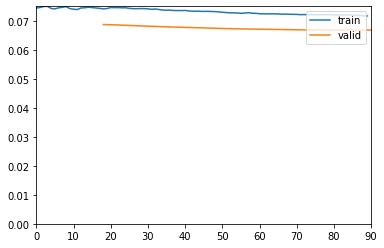

Better model found at epoch 0 with valid_loss value: 0.06877565383911133.
Better model found at epoch 1 with valid_loss value: 0.0679146870970726.
Better model found at epoch 2 with valid_loss value: 0.06725554913282394.
Better model found at epoch 3 with valid_loss value: 0.06691059470176697.
Better model found at epoch 4 with valid_loss value: 0.06684005260467529.


Learner(data=ImageDataBunch;

Train: LabelList (4796 items)
x: ImageList
Image (3, 112, 112),Image (3, 112, 112),Image (3, 112, 112),Image (3, 112, 112),Image (3, 112, 112)
y: MultiCategoryList
kurtaset;palazzos;withoutdupatta;calflength;roundneck;ethnicmotifs;aline;threefourthsleeves,kurtaset;trousers;withoutdupatta;aboveknee;vneck;abstract;aline;shortsleeves,kurtaset;palazzos;withoutdupatta;calflength;roundneck;solidwithembroideryplacement;aline;longsleeves,kurtaset;pyjamas;withoutdupatta;aboveknee;mandarincollar;striped;straight;threefourthsleeves,kurtaset;trousers;withoutdupatta;calflength;mandarincollar;solid;straight;longsleeves
Path: /datadrive/shreyas/ML_PIPELINE/automl;

Valid: LabelList (1198 items)
x: ImageList
Image (3, 112, 112),Image (3, 112, 112),Image (3, 112, 112),Image (3, 112, 112),Image (3, 112, 112)
y: MultiCategoryList
tshirts;frontplacement;roundneck;0.0;superhero;shortsleeves;regulartop,tshirts;allover;shirtcollar;0.0;solid;shortsleeves;regulartop,tshirts;frontp

In [6]:
learn = cnn_learner(data, arch, metrics=[acc_02, f_score], pretrained = True)
learn.load('pt_resnet34-stage-1');
learn.purge()
learn.unfreeze()

lr=1e-4
learn.fit_one_cycle(5,max_lr=slice(lr/100,lr),callbacks=[ShowGraph(learn),SaveModelCallback(learn)])


learn.save('pt_resnet34-stage-2')
learn.load('pt_resnet34-stage-2')


In [7]:
learn = None
gc.collect()

20

In [8]:
torch.cuda.empty_cache()

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.075933,0.069949,0.966921,0.570224,01:52
1,0.075375,0.068787,0.967024,0.580167,01:49
2,0.074624,0.068221,0.967073,0.584207,01:50
3,0.073945,0.067808,0.967235,0.588789,01:49
4,0.073520,0.067858,0.967235,0.587002,01:47


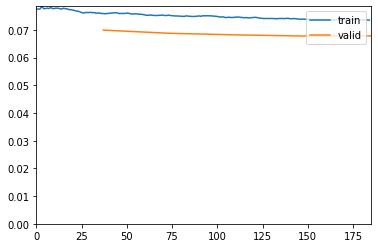

Better model found at epoch 0 with valid_loss value: 0.06994945555925369.
Better model found at epoch 1 with valid_loss value: 0.06878749281167984.
Better model found at epoch 2 with valid_loss value: 0.06822127848863602.
Better model found at epoch 3 with valid_loss value: 0.06780816614627838.


Learner(data=ImageDataBunch;

Train: LabelList (4796 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: MultiCategoryList
kurtaset;palazzos;withoutdupatta;calflength;roundneck;ethnicmotifs;aline;threefourthsleeves,kurtaset;trousers;withoutdupatta;aboveknee;vneck;abstract;aline;shortsleeves,kurtaset;palazzos;withoutdupatta;calflength;roundneck;solidwithembroideryplacement;aline;longsleeves,kurtaset;pyjamas;withoutdupatta;aboveknee;mandarincollar;striped;straight;threefourthsleeves,kurtaset;trousers;withoutdupatta;calflength;mandarincollar;solid;straight;longsleeves
Path: /datadrive/shreyas/ML_PIPELINE/automl;

Valid: LabelList (1198 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: MultiCategoryList
tshirts;frontplacement;roundneck;0.0;superhero;shortsleeves;regulartop,tshirts;allover;shirtcollar;0.0;solid;shortsleeves;regulartop,tshirts;frontp

In [9]:
size = 224
bs = 128
data = (src.transform(tfms, size=size)
        .databunch(bs = bs).normalize(imagenet_stats))

learn = cnn_learner(data, arch, metrics=[acc_02, f_score], wd=0.1, pretrained=True)
learn.load('pt_resnet34-stage-2');

lr=1e-4
learn.fit_one_cycle(5,max_lr=slice(lr/100,lr),callbacks=[ShowGraph(learn),SaveModelCallback(learn)])

learn.save('pt_resnet34-stage-3');
learn.load('pt_resnet34-stage-3')




epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.071750,0.065257,0.967836,0.621569,01:32
1,0.070037,0.063778,0.968563,0.630027,01:33
2,0.068908,0.062606,0.969102,0.634366,01:33
3,0.067964,0.062187,0.969070,0.637082,01:32
4,0.066889,0.062020,0.969501,0.638824,01:32


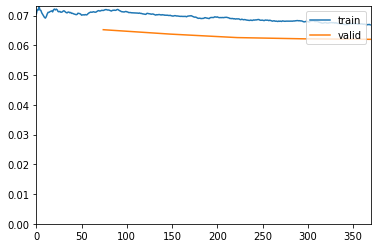

Better model found at epoch 0 with valid_loss value: 0.06525721400976181.
Better model found at epoch 1 with valid_loss value: 0.06377820670604706.
Better model found at epoch 2 with valid_loss value: 0.06260568648576736.
Better model found at epoch 3 with valid_loss value: 0.06218745559453964.
Better model found at epoch 4 with valid_loss value: 0.06202026456594467.


In [10]:
learn = None
gc.collect()
torch.cuda.empty_cache()

size = 128
bs = 64
data = (src.transform(tfms, size=size)
        .databunch(bs = bs).normalize(imagenet_stats))


learn = cnn_learner(data, arch, metrics=[acc_02, f_score], wd=0.1, pretrained=True)
learn.load('pt_resnet34-stage-3');

lr = 3e-4
learn.fit_one_cycle(5,max_lr=lr,callbacks=[ShowGraph(learn),SaveModelCallback(learn)])

learn.save('pt_resnet34-stage-4')

learn.load('pt_resnet34-stage-4');


epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.071984,0.066484,0.968787,0.581825,01:54
1,0.072206,0.066471,0.968671,0.583226,01:52
2,0.072039,0.066291,0.968729,0.584924,01:51
3,0.071773,0.066215,0.968671,0.585914,01:53
4,0.071764,0.066236,0.968909,0.585801,01:54


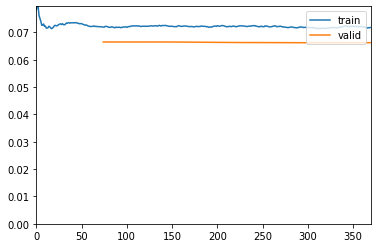

Better model found at epoch 0 with valid_loss value: 0.06648354232311249.
Better model found at epoch 1 with valid_loss value: 0.0664713978767395.
Better model found at epoch 2 with valid_loss value: 0.06629056483507156.
Better model found at epoch 3 with valid_loss value: 0.0662151426076889.


In [11]:
learn = None
gc.collect()
torch.cuda.empty_cache()

size = 256
bs = 64
data = (src.transform(tfms, size=size)
        .databunch(bs = bs).normalize(imagenet_stats))

learn = cnn_learner(data, arch, metrics=[acc_02, f_score], wd=0.1, pretrained=True)
learn.load('pt_resnet34-stage-4');

lr=3e-6
learn.fit_one_cycle(5,max_lr=slice(lr/100,lr),callbacks=[ShowGraph(learn),SaveModelCallback(learn)])

learn.save('pt_resnet34-stage-5')






Traceback (most recent call last):
Traceback (most recent call last):
  File "/datadrive/conda/anaconda3/envs/fastai/lib/python3.7/multiprocessing/queues.py", line 242, in _feed
    send_bytes(obj)
  File "/datadrive/conda/anaconda3/envs/fastai/lib/python3.7/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/datadrive/conda/anaconda3/envs/fastai/lib/python3.7/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/datadrive/conda/anaconda3/envs/fastai/lib/python3.7/multiprocessing/queues.py", line 242, in _feed
    send_bytes(obj)
  File "/datadrive/conda/anaconda3/envs/fastai/lib/python3.7/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe
Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "/datadrive/conda/anaconda3/envs/fastai/lib/python3.7/multiprocessing/queues.py", line 232, in _fe

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.090154,0.080588,0.966799,0.465018,02:45
1,0.090125,0.079727,0.967042,0.475834,02:42
2,0.089155,0.080152,0.966777,0.474456,02:45
3,0.088147,0.079453,0.966571,0.477163,02:43
4,0.090023,0.079892,0.966387,0.470803,02:44


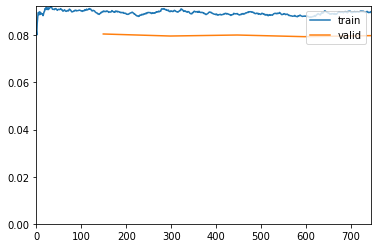

Better model found at epoch 0 with valid_loss value: 0.0805884301662445.
Better model found at epoch 1 with valid_loss value: 0.07972687482833862.
Better model found at epoch 3 with valid_loss value: 0.07945317775011063.


In [14]:
learn = None
gc.collect()
torch.cuda.empty_cache()

size = 448
bs = 32
data = (src.transform(tfms, size=size)
        .databunch(bs = bs).normalize(imagenet_stats))

learn = cnn_learner(data, arch, metrics=[acc_02, f_score], wd=0.1, pretrained=True)
learn.load('pt_resnet34-stage-5');

lr=3e-6
learn.fit_one_cycle(5,max_lr=slice(lr/100,lr),callbacks=[ShowGraph(learn),SaveModelCallback(learn)])

learn.save('pt_resnet34-stage-6')




In [24]:
!nvidia-smi


Sat Aug  3 05:50:02 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  On   | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P0    43W / 300W |  12963MiB / 16130MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

# densenet

In [23]:
size = 112
bs = 256

tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)
np.random.seed(42)
src = (ImageList.from_csv(path, 'ml_trainset_1k.csv', folder='images')
       .split_by_rand_pct(0.2)
       .label_from_df(label_delim=','))


data = (src.transform(tfms, size=size)
        .databunch(bs = bs).normalize(imagenet_stats))


arch = models.densenet169
acc_02 = partial(accuracy_thresh, thresh=0.5)
f_score = partial(fbeta, thresh=0.5)
# learn = cnn_learner(data, arch, metrics=[acc_02, f_score], pretrained=True)




epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.818716,0.681204,0.567110,0.240531,01:39
1,0.674064,0.277087,0.971112,0.449823,01:40
2,0.438340,0.098881,0.968954,0.259278,01:38
3,0.301180,0.088010,0.970655,0.326170,01:40
4,0.223833,0.082675,0.972494,0.398411,01:39


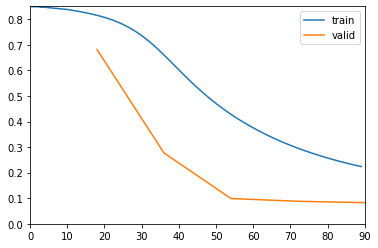

Better model found at epoch 0 with valid_loss value: 0.6812037229537964.
Better model found at epoch 1 with valid_loss value: 0.2770867943763733.
Better model found at epoch 2 with valid_loss value: 0.09888108819723129.
Better model found at epoch 3 with valid_loss value: 0.08801008760929108.
Better model found at epoch 4 with valid_loss value: 0.08267492055892944.


In [25]:
lr = 0.01
np.random.seed(42)
learn = cnn_learner(data, models.densenet169, metrics=[acc_02, f_score], wd=0.1,  pretrained=True)
learn = learn.to_fp16()

learn.fit_one_cycle(5,callbacks=[ShowGraph(learn),SaveModelCallback(learn)])

learn.save('pt_densenet169-stage-1')






epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.087864,0.078798,0.973756,0.461670,01:39
1,0.086887,0.076119,0.974527,0.494972,01:42
2,0.085801,0.074663,0.974851,0.507193,01:40
3,0.084786,0.074091,0.974927,0.511215,01:39
4,0.083958,0.073991,0.974967,0.510220,01:41


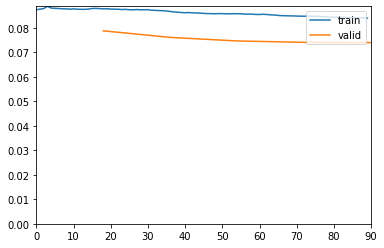

Better model found at epoch 0 with valid_loss value: 0.07879750430583954.
Better model found at epoch 1 with valid_loss value: 0.07611893862485886.
Better model found at epoch 2 with valid_loss value: 0.07466308027505875.
Better model found at epoch 3 with valid_loss value: 0.07409100979566574.
Better model found at epoch 4 with valid_loss value: 0.0739913359284401.


In [26]:
learn.purge()
learn.load('pt_densenet169-stage-1')
learn = learn.to_fp16()

learn.unfreeze()
lr=1e-4
learn.fit_one_cycle(5,max_lr=slice(lr/100,lr),callbacks=[ShowGraph(learn),SaveModelCallback(learn)])
learn.save('pt_densenet169-stage-2')


epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.082569,0.073559,0.974985,0.507705,01:35
1,0.081306,0.072324,0.975093,0.508574,01:35
2,0.080486,0.071493,0.975232,0.511801,01:36
3,0.079645,0.070990,0.975326,0.514752,01:34
4,0.079395,0.071029,0.975223,0.512243,01:33


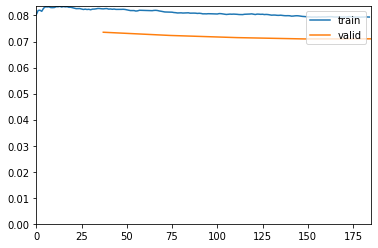

Better model found at epoch 0 with valid_loss value: 0.07355864346027374.
Better model found at epoch 1 with valid_loss value: 0.0723235234618187.
Better model found at epoch 2 with valid_loss value: 0.07149336487054825.
Better model found at epoch 3 with valid_loss value: 0.07099011540412903.


In [27]:
size = 112
bs = 128

tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)
np.random.seed(42)

data = (src.transform(tfms, size=size)
        .databunch(bs = bs).normalize(imagenet_stats))


learn = cnn_learner(data, models.densenet169, metrics=[acc_02, f_score], wd=0.1,  pretrained=True).to_fp16()
learn.load('pt_densenet169-stage-2');

learn.purge()
learn.freeze()

learn.fit_one_cycle(5,max_lr=slice(lr/100,lr),callbacks=[ShowGraph(learn),SaveModelCallback(learn)])
learn.save('pt_densenet169-stage-3')

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.082601,0.072038,0.974927,0.508850,01:50
1,0.078501,0.068140,0.975824,0.548336,01:50
2,0.075595,0.066451,0.976309,0.557928,01:50
3,0.073776,0.065616,0.976574,0.563237,01:51
4,0.072854,0.065424,0.976605,0.561130,01:49


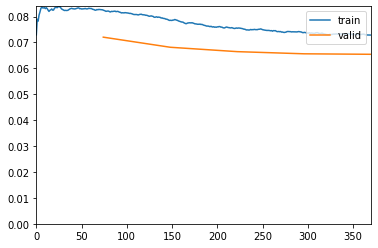

Better model found at epoch 0 with valid_loss value: 0.07203825563192368.
Better model found at epoch 1 with valid_loss value: 0.06814023107290268.
Better model found at epoch 2 with valid_loss value: 0.06645069271326065.
Better model found at epoch 3 with valid_loss value: 0.06561574339866638.
Better model found at epoch 4 with valid_loss value: 0.06542444974184036.


In [28]:
size = 224
bs = 64

tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)
np.random.seed(42)

data = (src.transform(tfms, size=size)
        .databunch(bs = bs).normalize(imagenet_stats))


learn = cnn_learner(data, models.densenet169, metrics=[acc_02, f_score], wd=0.1,  pretrained=True).to_fp16()
learn.load('pt_densenet169-stage-3');

lr = 1e-4
learn.fit_one_cycle(5,max_lr=lr,callbacks=[ShowGraph(learn),SaveModelCallback(learn)])
learn.save('pt_densenet169-stage-4')

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.079629,0.068478,0.975578,0.538326,02:48
1,0.075115,0.064450,0.976843,0.573318,02:52
2,0.071667,0.062524,0.977534,0.586459,02:50
3,0.069658,0.061844,0.977844,0.587033,02:50
4,0.068314,0.061841,0.977794,0.588334,02:50


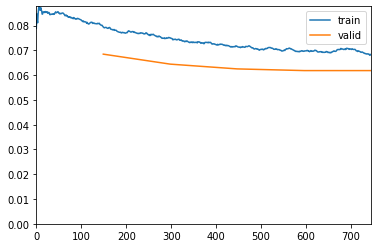

Better model found at epoch 0 with valid_loss value: 0.06847826391458511.
Better model found at epoch 1 with valid_loss value: 0.06444965302944183.
Better model found at epoch 2 with valid_loss value: 0.0625242218375206.
Better model found at epoch 3 with valid_loss value: 0.061843592673540115.
Better model found at epoch 4 with valid_loss value: 0.061841294169425964.


In [29]:
learn = None
gc.collect()
torch.cuda.empty_cache()

size = 448
bs = 32


tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)
np.random.seed(42)

data = (src.transform(tfms, size=size)
        .databunch(bs = bs).normalize(imagenet_stats))

learn = cnn_learner(data, models.densenet169, metrics=[acc_02, f_score], wd=0.1,  pretrained=True).to_fp16()
learn.load('pt_densenet169-stage-4');

lr = 1e-4
learn.fit_one_cycle(5,max_lr=lr,callbacks=[ShowGraph(learn),SaveModelCallback(learn)])
learn.save('pt_densenet169-stage-5')

In [22]:
i = ['yyy', 'hhh']
for appId in i:    
    filename = '/datadrive/' + f'{appId}' + '.json' 
    print(filename)

/datadrive/yyy.json
/datadrive/hhh.json


epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.072869,0.061213,0.977907,0.610695,03:38
1,0.076176,0.059672,0.978634,0.613757,03:58
2,0.071118,0.058539,0.979091,0.608364,03:35
3,0.068918,0.057600,0.979397,0.622360,03:33
4,0.070501,0.057548,0.979329,0.632635,03:33


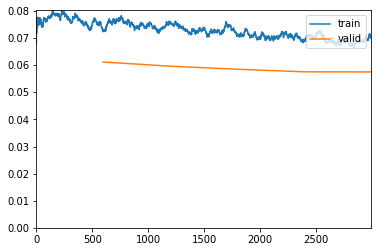

Better model found at epoch 0 with valid_loss value: 0.061212606728076935.
Better model found at epoch 1 with valid_loss value: 0.05967156961560249.
Better model found at epoch 2 with valid_loss value: 0.05853914096951485.
Better model found at epoch 3 with valid_loss value: 0.05760014429688454.
Better model found at epoch 4 with valid_loss value: 0.05754789710044861.


In [30]:
learn = None
gc.collect()
torch.cuda.empty_cache()

size = 448
bs = 8


tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)
np.random.seed(42)

data = (src.transform(tfms, size=size)
        .databunch(bs = bs).normalize(imagenet_stats))

learn = cnn_learner(data, models.densenet169, metrics=[acc_02, f_score], wd=0.1,  pretrained=True).to_fp16()
learn.load('pt_densenet169-stage-5');

lr = 1e-4
learn.fit_one_cycle(5,max_lr=lr,callbacks=[ShowGraph(learn),SaveModelCallback(learn)])
learn.save('pt_densenet169-stage-6')

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.070179,0.057095,0.979590,0.627638,04:04
1,0.069378,0.056250,0.979940,0.628357,04:03
2,0.067888,0.055013,0.980492,0.640489,04:05
3,0.064735,0.054367,0.980586,0.651869,04:02
4,0.063200,0.054197,0.980725,0.656794,04:00


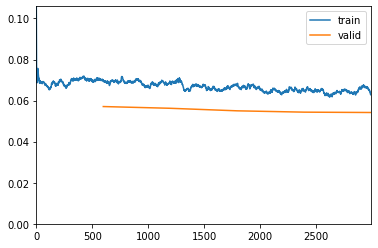

Better model found at epoch 0 with valid_loss value: 0.05709487199783325.
Better model found at epoch 1 with valid_loss value: 0.05624987185001373.
Better model found at epoch 2 with valid_loss value: 0.05501309782266617.
Better model found at epoch 3 with valid_loss value: 0.05436691269278526.
Better model found at epoch 4 with valid_loss value: 0.05419690161943436.


In [31]:
learn.purge()
learn.load('pt_densenet169-stage-6')
learn = learn.to_fp16()

learn.unfreeze()
lr=1e-4
learn.fit_one_cycle(5,max_lr=slice(lr/100,lr),callbacks=[ShowGraph(learn),SaveModelCallback(learn)])
learn.save('pt_densenet169-stage-7')


In [35]:
learn.purge()
learn.load('pt_densenet169-stage-7')
lr=1e-3
learn.fit_one_cycle(5,max_lr=slice(lr/100,lr),callbacks=[ShowGraph(learn),SaveModelCallback(learn)])
learn.save('pt_densenet169-stage-8')

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time


RuntimeError: invalid argument 0: Tensors must have same number of dimensions: got 2 and 3 at /pytorch/aten/src/THC/generic/THCTensorMath.cu:62

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.042943,0.043653,0.984253,0.729807,03:20
1,0.045190,0.043728,0.984271,0.722404,03:20
2,0.041854,0.043829,0.984360,0.724479,03:22
3,0.043085,0.043536,0.984437,0.724334,03:23
4,0.043451,0.043609,0.984383,0.723950,03:23
5,0.043096,0.043631,0.984437,0.724347,03:19
6,0.045566,0.044423,0.984203,0.717957,03:22
7,0.046271,0.044286,0.984190,0.719225,03:21
8,0.044808,0.043987,0.984427,0.723933,03:23
9,0.045691,0.043909,0.984401,0.726892,03:22


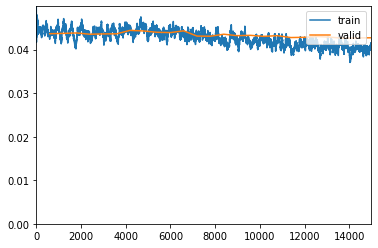

Better model found at epoch 0 with valid_loss value: 0.04365317150950432.
Better model found at epoch 3 with valid_loss value: 0.04353561997413635.
Better model found at epoch 11 with valid_loss value: 0.04310612007975578.
Better model found at epoch 12 with valid_loss value: 0.0430842749774456.
Better model found at epoch 16 with valid_loss value: 0.04304441809654236.
Better model found at epoch 18 with valid_loss value: 0.04277438670396805.
Better model found at epoch 22 with valid_loss value: 0.04259999841451645.


In [45]:
learn = None
gc.collect()
torch.cuda.empty_cache()

size = 448
bs = 8


tfms = get_transforms(flip_vert=False, max_lighting=0.1, max_zoom=1.05, max_warp=0.)
np.random.seed(42)

data = (src.transform(tfms, size=size)
        .databunch(bs = bs).normalize(imagenet_stats))

learn = cnn_learner(data, models.densenet169, metrics=[acc_02, f_score], wd=0.1,  pretrained=True).to_fp16()
learn.load('pt_densenet169-stage-11')
lr = 1e-4
learn.fit_one_cycle(25,max_lr=lr,callbacks=[ShowGraph(learn),SaveModelCallback(learn)])
learn.save('pt_densenet169-stage-12')

In [36]:
learn.load('pt_densenet169-stage-7')

Learner(data=ImageDataBunch;

Train: LabelList (4796 items)
x: ImageList
Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448)
y: MultiCategoryList
kurtaset;palazzos;withoutdupatta;calflength;roundneck;ethnicmotifs;aline;threefourthsleeves,kurtaset;trousers;withoutdupatta;aboveknee;vneck;abstract;aline;shortsleeves,kurtaset;palazzos;withoutdupatta;calflength;roundneck;solidwithembroideryplacement;aline;longsleeves,kurtaset;pyjamas;withoutdupatta;aboveknee;mandarincollar;striped;straight;threefourthsleeves,kurtaset;trousers;withoutdupatta;calflength;mandarincollar;solid;straight;longsleeves
Path: /datadrive/shreyas/ML_PIPELINE/automl;

Valid: LabelList (1198 items)
x: ImageList
Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448)
y: MultiCategoryList
tshirts;frontplacement;roundneck;0.0;superhero;shortsleeves;regulartop,tshirts;allover;shirtcollar;0.0;solid;shortsleeves;regulartop,tshirts;frontp

In [37]:
learn.freeze()

In [38]:
learn

Learner(data=ImageDataBunch;

Train: LabelList (4796 items)
x: ImageList
Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448)
y: MultiCategoryList
kurtaset;palazzos;withoutdupatta;calflength;roundneck;ethnicmotifs;aline;threefourthsleeves,kurtaset;trousers;withoutdupatta;aboveknee;vneck;abstract;aline;shortsleeves,kurtaset;palazzos;withoutdupatta;calflength;roundneck;solidwithembroideryplacement;aline;longsleeves,kurtaset;pyjamas;withoutdupatta;aboveknee;mandarincollar;striped;straight;threefourthsleeves,kurtaset;trousers;withoutdupatta;calflength;mandarincollar;solid;straight;longsleeves
Path: /datadrive/shreyas/ML_PIPELINE/automl;

Valid: LabelList (1198 items)
x: ImageList
Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448)
y: MultiCategoryList
tshirts;frontplacement;roundneck;0.0;superhero;shortsleeves;regulartop,tshirts;allover;shirtcollar;0.0;solid;shortsleeves;regulartop,tshirts;frontp

In [61]:
preds,y,losses = learn.get_preds(with_loss=True)

In [47]:
interp = ClassificationInterpretation(learn, preds, y, losses)


49 misclassified samples over 1198 samples in the validation set.


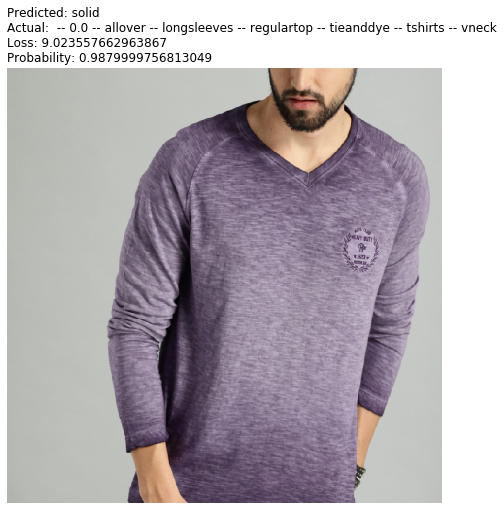

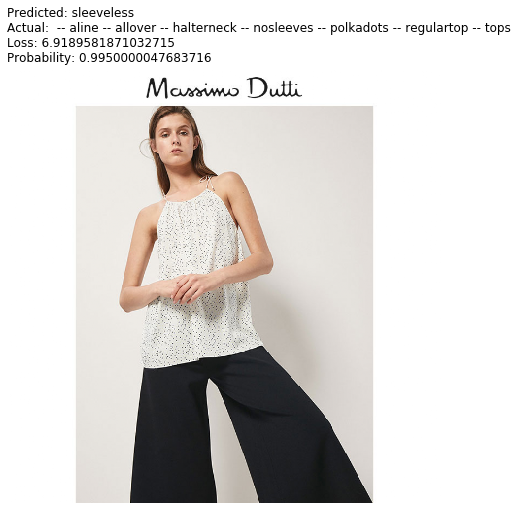

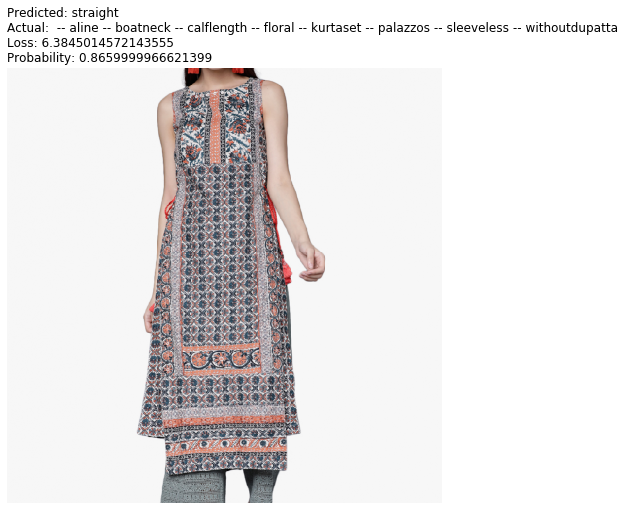

In [50]:
interp.plot_multi_top_losses()

In [51]:
mean_cm, single_img_cm = interp._generate_confusion()


AttributeError: 'ClassificationInterpretation' object has no attribute '_generate_confusion'

In [57]:
test_dn5 = pd.read_csv(path+'/ml_trainset_1k.csv')
thresh = 0.4

#get preds
labelled_preds = [','.join([learn.data.classes[i] for i,p in enumerate(pred) if p > thresh]) for pred in tqdm(preds)]

test_dn5['pred'] = labelled_preds

test_dn5.to_csv('/datadrive/multi-label-training/test_DN5_pred.csv')

100%|██████████| 1198/1198 [00:01<00:00, 891.14it/s]


ValueError: Length of values does not match length of index

In [60]:
test_dn5

,1_local_product_id,tags
0,c66ac821cbe709aa86fe6d66a9efdd02.jpg,"kurtaset,palazzos,withoutdupatta,calflength,ro..."
1,a89aba52702f1aa60e24805841dacd35.jpg,"kurtaset,trousers,withoutdupatta,aboveknee,vne..."
2,74dfa06c491c5f8f4c5f8b9b849752a6.jpg,"kurtaset,palazzos,withoutdupatta,calflength,ro..."
3,f8a9f5ecbfc4ad1543810bea90b59b2f.jpg,"kurtaset,pyjamas,withoutdupatta,aboveknee,mand..."
4,3a97d7fb4f7982016145b1867d5e3bec.jpg,"kurtaset,trousers,withoutdupatta,calflength,ma..."
5,7dce74e3c650eb627891a1510b033e9e.jpg,"kurtaset,palazzos,withoutdupatta,calflength,bo..."
6,66940f10bb4ed3fd8ce5ffc876ab17a7.jpg,"kurtaset,palazzos,withoutdupatta,calflength,ke..."
7,229e69fc2c2139bf59413d7d0c953800.jpg,"kurtaset,skirt,withoutdupatta,floorlength,mand..."
8,90a068f6249748ccb9a3c1cf12d56587.jpg,"kurtaset,palazzos,withoutdupatta,calflength,ma..."
9,6b70272bdb6af8fe70db6ba8cc3ffffd.jpg,"kurtaset,palazzos,withoutdupatta,calflength,ro..."


In [54]:
test_dn5.assign(preds = labelled_preds)

ValueError: Length of values does not match length of index